# FINAL PROJECT REPORT - Introduction to AGNs

Meghana Pannikkote

### Aim: Classification of galaxies with emission lines

### TASK 1:
The first project task is to extract top 30,000 galaxies with narrow emission lines with redshift
z<0.35 from the SDSS database (e.g., DR17 or DR18 –http://www.sdss.org/) using the SQL
search and produce BPT diagram. 

###### Task (a) 
Obtain the following line fluxes[O III] $\lambda$5007, Hb, [N II] $\lambda$6583, Ha, [S II] $\lambda$6716, 6731,
[O I] $\lambda$6300, and equivalent width of H$\alpha$ from the SDSS spectral databases (tips: when
selecting galaxies define as one of the criteria that you only need narrow emission line; find a
way to calculate line fluxes using only data available in SDSS tables). For the division line use
the theoretical curves obtained by Kewley et al. (2001) and empirical curves from Kauffman
et al. (2003). Make plots for [O III] $\lambda$5007/H$\beta$ vs. [N II] $\lambda$6583/H$\alpha$, denoting with different marks/colors different object.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binned_statistic
%matplotlib inline

from astroquery.sdss import SDSS
sdss = SDSS()

In [2]:
query_a= """select top 30000 
s.specobjid, s.z as redshift, 
s.plate, s.mjd, s.fiberid, s.subclass,
g.oiii_5007_flux, g.h_beta_flux, g.h_alpha_flux, g.h_alpha_eqw, g.nii_6584_flux, 
g.sii_6717_flux, g.sii_6731_flux, g.oi_6300_flux
from SpecObj as s 
join GalSpecLine as g on s.specobjid = g.specobjid
where s.class = 'GALAXY' 
and g.sigma_forbidden*2.35<500
and g.sigma_balmer*2.35<500
and s.z<0.35
and g.h_alpha_flux > 0
and g.h_beta_flux > 0
and g.oiii_5007_flux > 0
and g.nii_6584_flux > 0
and g.oi_6300_flux > 0
and g.sii_6717_flux > 0
and g.sii_6731_flux > 0
and g.h_alpha_flux/g.h_alpha_flux_err > 5
and g.h_beta_flux/g.h_beta_flux_err > 5
and g.oiii_5007_flux/g.oiii_5007_flux_err > 5
and g.nii_6584_flux/g.nii_6584_flux_err > 5
and g.oi_6300_flux/g.oi_6300_flux_err > 5
and g.sii_6717_flux/g.sii_6717_flux_err > 5
and g.sii_6731_flux/g.sii_6731_flux_err > 5"""

data = sdss.query_sql(query_a).to_pandas()
data.head()

/home/meghana/miniconda3/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


specobjid  redshift  plate    mjd  fiberid        subclass  \
0  300748617889638400  0.026167    267  51608      485    b'STARBURST'   
1  300758238616381440  0.020762    267  51608      520    b'STARBURST'   
2  300786551040796672  0.047478    267  51608      623  b'STARFORMING'   
3  301766766076389376  0.081498    268  51633       93  b'STARFORMING'   
4  304038911485700096  0.069013    270  51909      167    b'STARBURST'   

   oiii_5007_flux  h_beta_flux  h_alpha_flux  h_alpha_eqw  nii_6584_flux  \
0      2147.52800    652.49690     2008.5080   -158.37750      139.44220   
1       625.72140    223.97370      627.8340    -83.76127       48.62620   
2        33.10904     81.85916      291.8169    -22.97101      103.73940   
3        22.72418     43.76684      158.9809    -28.04214       42.66686   
4       200.42340    179.64700      604.6330    -83.09872      157.49260   

   sii_6717_flux  sii_6731_flux  oi_6300_flux  
0      190.95580      150.77240     30.685880  
1       85.42367       57.48413     14.985580  
2       63.30307       40.00652      9.725575  
3       33.78152       21.48560      7.434615  
4       96.43003       70.00793     14.956900

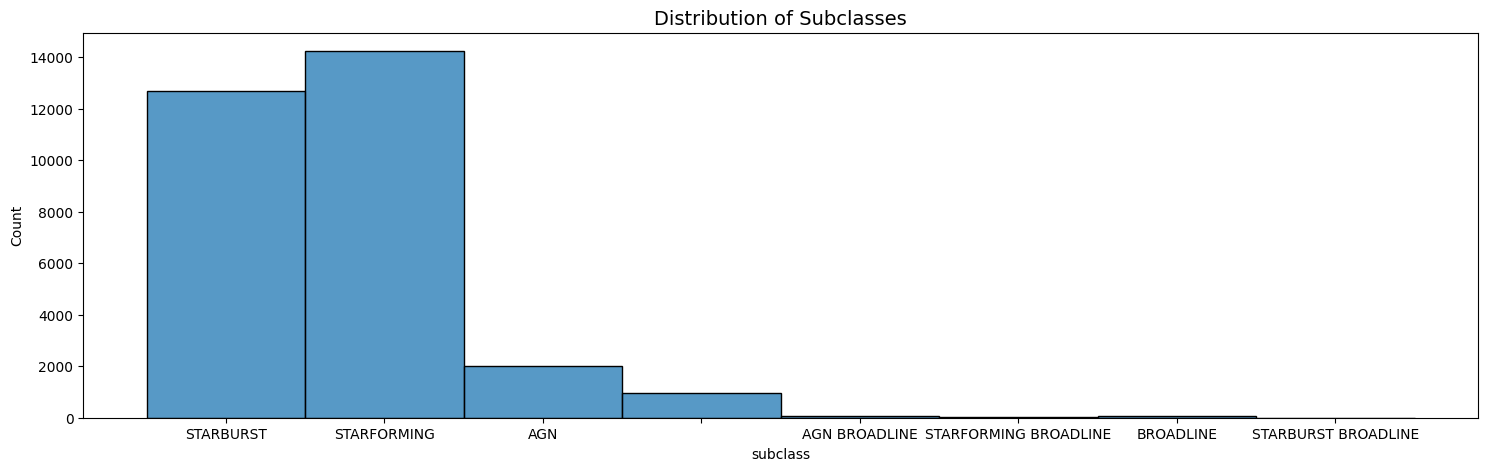

In [3]:
plt.figure(figsize = (18,5)) 
sns.histplot(data=data, x="subclass", binwidth=0.1)
plt.title('Distribution of Subclasses', fontsize=14);

/tmp/ipykernel_15629/500064029.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(kewley_x, kewley_logoiii_hb,'k:', color='black',markersize=1, label='Kewley et al. (2001)')


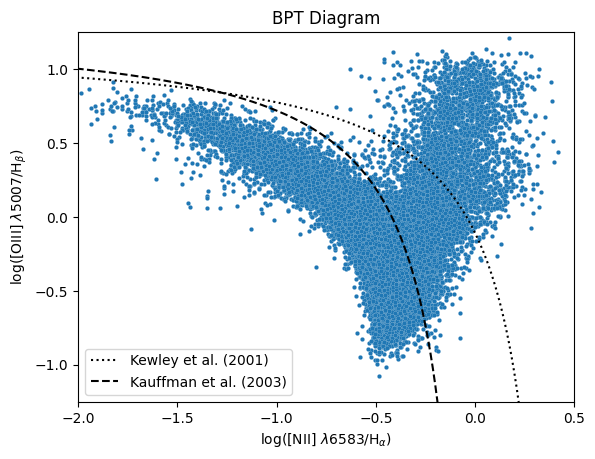

In [4]:
#[O III]𝜆5007/H𝛽 vs. [N II]𝜆6583/H𝛼
kewley_x = np.linspace(-4,0.4, 1000)
kauffman_x = np.linspace(-4,0, 1000)

data['logoiii/hb'] = np.log10(data['oiii_5007_flux']/data['h_beta_flux'])
data['lognii/ha'] = np.log10(data['nii_6584_flux']/data['h_alpha_flux'])

kewley_logoiii_hb = 0.61/(kewley_x-0.47) +1.19
kauffman_logoiii_hb = 0.61/(kauffman_x-0.05) +1.3

sns.scatterplot(data, x='lognii/ha',y='logoiii/hb', linewidth=0.1, s=10)
plt.plot(kewley_x, kewley_logoiii_hb,'k:', color='black',markersize=1, label='Kewley et al. (2001)')
plt.plot(kauffman_x, kauffman_logoiii_hb, '--', color='black', label='Kauffman et al. (2003)')

plt.title(r'BPT Diagram')
plt.xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
plt.ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')

plt.xlim(-2,0.5)
plt.ylim(-1.25,1.25)
plt.legend()
plt.show()

In [5]:
data['kewley_class']= np.where( np.logical_or(data['logoiii/hb']> (0.61/(data['lognii/ha']-0.47)+1.19), (data['lognii/ha']>0)) , 'AGN', 'starburst')
data['kaufmann_class'] = np.where( np.logical_or(data['logoiii/hb'] > (0.61/(data['lognii/ha']-0.05)+1.3), data['lognii/ha']>0), 'AGN', 'starburst')
data['BPT_class'] = np.where(((data['kaufmann_class']=='starburst')&(data['kewley_class']=='starburst')), "SFG", np.where(((data['kaufmann_class']=='AGN')&(data['kewley_class']=='AGN')), "AGN", "composite"))

/tmp/ipykernel_15629/2655059435.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(kewley_x, kewley_logoiii_hb,'k:', markersize=1, color='black', label='Kewley et al. (2001)')
/tmp/ipykernel_15629/2655059435.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(kewley_x, kewley_logoiii_hb,'k:', markersize=1, color='black', label='Kewley et al. (2001)')


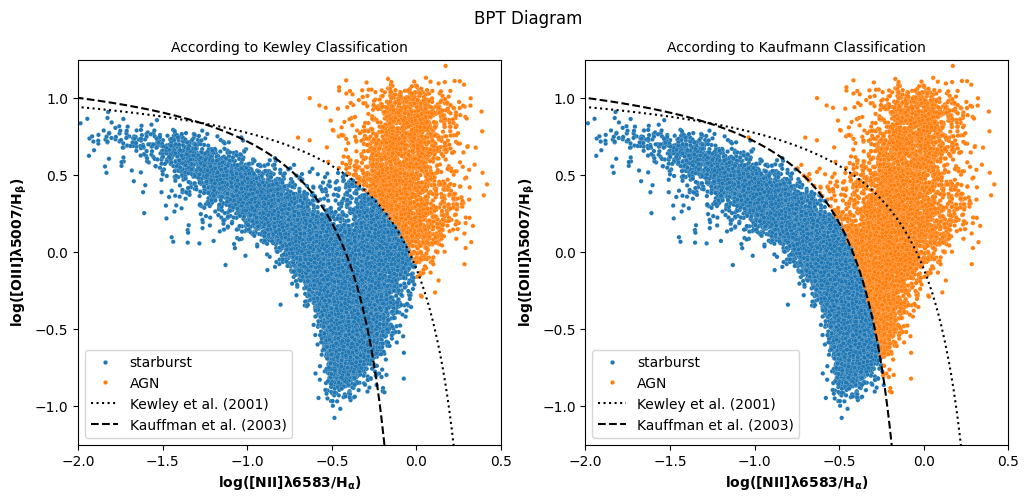

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('BPT Diagram')

sns.scatterplot(data, x='lognii/ha',y='logoiii/hb', ax=ax[0], hue='kewley_class', linewidth=0.1, s=10)
ax[0].plot(kewley_x, kewley_logoiii_hb,'k:', markersize=1, color='black', label='Kewley et al. (2001)')
ax[0].plot(kauffman_x, kauffman_logoiii_hb, '--', color='black', label='Kauffman et al. (2003)')
ax[0].set_title(r'According to Kewley Classification', fontsize=10)
ax[0].set_xlabel(r'$\bf log([NII] \lambda 6583 /H_{\alpha})$')
ax[0].set_ylabel(r'$\bf log([OIII] \lambda 5007 /H_{\beta})$')
ax[0].set_xlim(-2,0.5)
ax[0].set_ylim(-1.25,1.25)
ax[0].legend()

sns.scatterplot(data, x='lognii/ha',y='logoiii/hb', ax=ax[1], hue='kaufmann_class', linewidth=0.1,s=10)
ax[1].plot(kewley_x, kewley_logoiii_hb,'k:', markersize=1, color='black', label='Kewley et al. (2001)')
ax[1].plot(kauffman_x, kauffman_logoiii_hb, '--', color='black', label='Kauffman et al. (2003)')
ax[1].set_title(r'According to Kaufmann Classification', fontsize=10)
ax[1].set_xlabel(r'$\bf log([NII] \lambda 6583 /H_{\alpha})$')
ax[1].set_ylabel(r'$\bf log([OIII] \lambda 5007 /H_{\beta})$')
ax[1].set_xlim(-2,0.5)
ax[1].set_ylim(-1.25,1.25)
ax[1].legend()

plt.show()

/tmp/ipykernel_15629/2229220189.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(kewley_x, kewley_logoiii_hb,'k:', color='black',markersize=1, label='Kewley et al. (2001)')


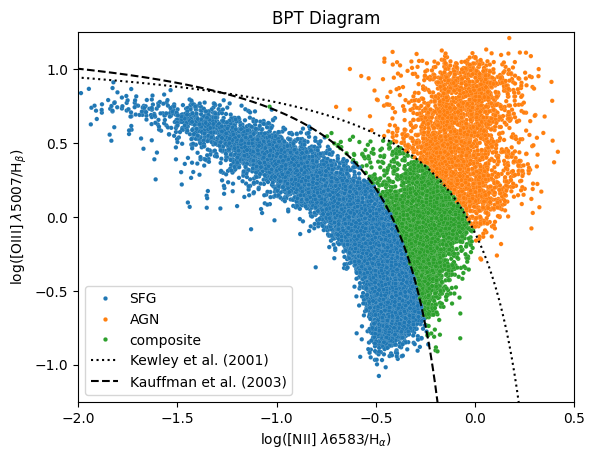

In [7]:
sns.scatterplot(data, x='lognii/ha',y='logoiii/hb', linewidth=0.07, s=10, hue='BPT_class')
plt.plot(kewley_x, kewley_logoiii_hb,'k:', color='black',markersize=1, label='Kewley et al. (2001)')
plt.plot(kauffman_x, kauffman_logoiii_hb, '--', color='black', label='Kauffman et al. (2003)')

plt.title(r'BPT Diagram')
plt.xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
plt.ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')
plt.legend(title='BPT classification')

plt.xlim(-2,0.5)
plt.ylim(-1.25,1.25)
plt.legend()
plt.show()

##### Task (b) 
Test is there a cosmic evolution of the BPT diagram (see e.g., Kewley et a. 2013) by
plotting the BPT diagrams for different redshift bins (e.g., Dz = 0.05 or 0.1). Could you notice
the change in the distribution of objects across the BPT plane? How would you explain this
cosmic evolution? Think of another way to present (and compare) distributions of different
sub-samples.

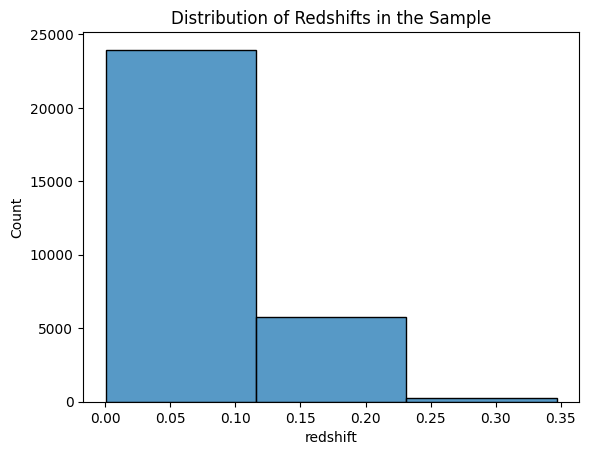

In [8]:
sns.histplot(data=data, x="redshift", binwidth=0.1);
plt.title('Distribution of Redshifts in the Sample');

In [9]:
bin_edges = np.arange(data.redshift.min(), data.redshift.max()+0.1, 0.1).tolist()
data['z_bin'] = pd.cut(data['redshift'], bins=bin_edges)

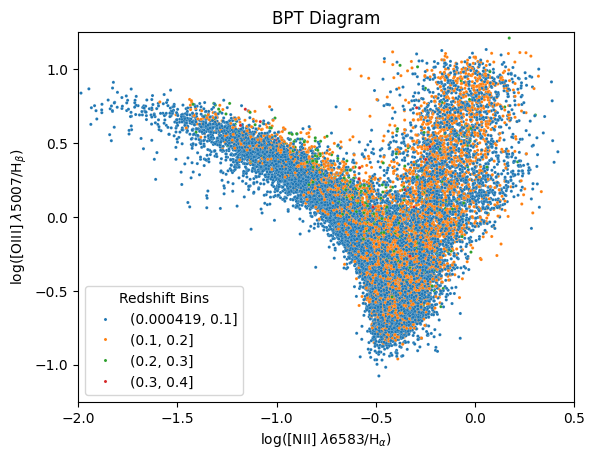

In [10]:
ax = sns.scatterplot(data, x='lognii/ha',y='logoiii/hb', s=5, hue='z_bin', alpha=1,linewidth=0.1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title(r'BPT Diagram')
plt.xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
plt.ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')
plt.legend(title='Redshift Bins')

plt.xlim(-2,0.5)
plt.ylim(-1.25,1.25)
plt.show()

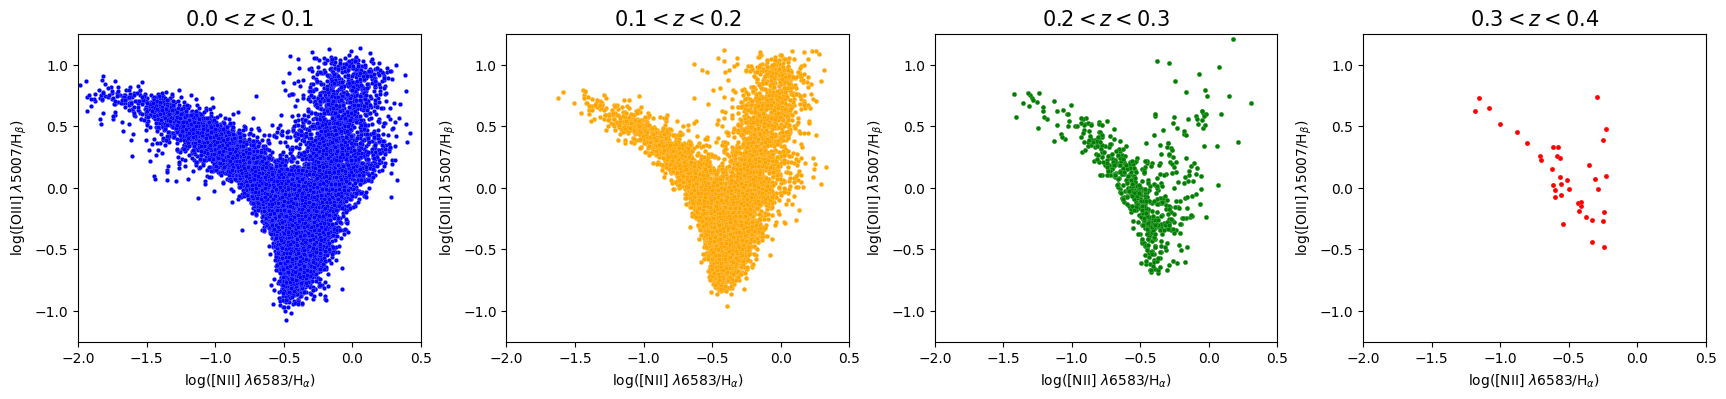

In [11]:
fig, ax = plt.subplots(1,4, figsize=(21,4))
c = ['blue','orange','green','red']

for i in range(4):
    bin_z = data[data['z_bin']==data['z_bin'].unique()[i]]
    sns.scatterplot(bin_z, x='lognii/ha',y='logoiii/hb', s=i+10, color=c[i], ax=ax[i], linewidth=0.1)
    ax[i].set_title(r'$%.1f<z<%.1f$'%(bin_z.z_bin.unique()[0].left,bin_z.z_bin.unique()[0].right), fontsize=15)
    ax[i].set_xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
    ax[i].set_ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')
    ax[i].set_xlim(-2,0.5)
    ax[i].set_ylim(-1.25,1.25)
    
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

The distribution of galaxies in the BPT plane across different redshift bins can be seen in the above plots. There are lesser galaxies observed at high redshifts. Let us check the changes in the distributions of star-forming and AGN-dominated galaxies in the BPT diagrams with redshift.

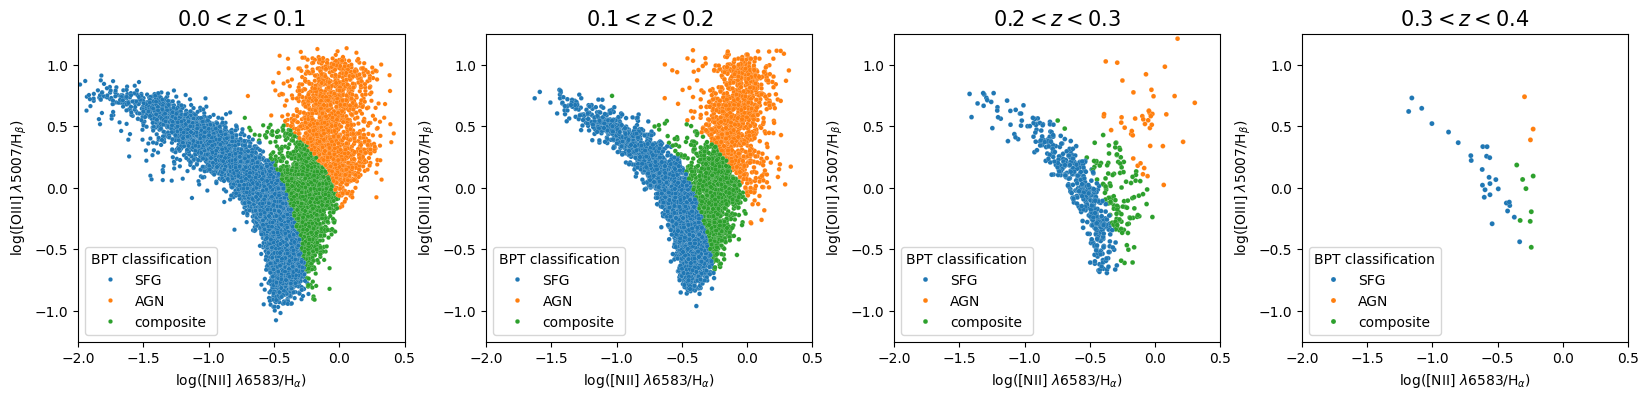

In [12]:
# Another way to compare distributions of different sub-samples
fig, ax = plt.subplots(1,4, figsize=(20,4))
hue_order = ['SFG','AGN','composite']

for i in range(4):
    bin_z = data[data['z_bin']==data['z_bin'].unique()[i]]
    sns.scatterplot(bin_z, x='lognii/ha',y='logoiii/hb', s=i+10, ax=ax[i], linewidth=0.1, hue='BPT_class', hue_order=hue_order)
    ax[i].set_title(r'$%.1f<z<%.1f$'%(bin_z.z_bin.unique()[0].left,bin_z.z_bin.unique()[0].right), fontsize=15)
    ax[i].set_xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
    ax[i].set_ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')
    ax[i].set_xlim(-2,0.5)
    ax[i].set_ylim(-1.25,1.25)
    ax[i].legend(title='BPT classification')
    
    
plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

- **Shift in Star Formation Rates:** At higher redshifts, star-forming galaxies show higher excitation lines due to higher star formation rates than AGN activity.
- **Evolution of AGN Activity**: The relative number of AGNs increase with redshift. With time, the galaxy interactions and mergers trigger AGN accretion and starbursts.
- **Chemical Evolution:** The primary driver for BPT evolution is chemical enrichment. At higher redshifts, galaxies generally have lower metallicities.

##### Task (c) 
Test the classification obtained using the first BPT diagnostics [OIII]λ5007/Hβ vs.
[NII]λ6584/Hα, with the other two common BPT diagnostic tools: 1) [OIII]λ5007/Hβ vs.
[SII]λλ6716,6731/Hα, 2) [OIII]λ5007/Hβ vs. [OI]λ6300/Hα. (Tip: use the same mark/color
notation as for the first diagnostic in order to be able to make comparison).

/tmp/ipykernel_15629/3093735758.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(kewley_x, kewley_logoiii_hb,'k:', color='black', label='Kewley et al. (2001)')
/tmp/ipykernel_15629/3093735758.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(sii_x,kewley_from_sii,'k:', color='black', label='Kewley et al. (2001)')
/tmp/ipykernel_15629/3093735758.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  ax[2].plot(oi_x,kewley_from_oi, 'k:', color='black', label='Kewley et al. (2001)')


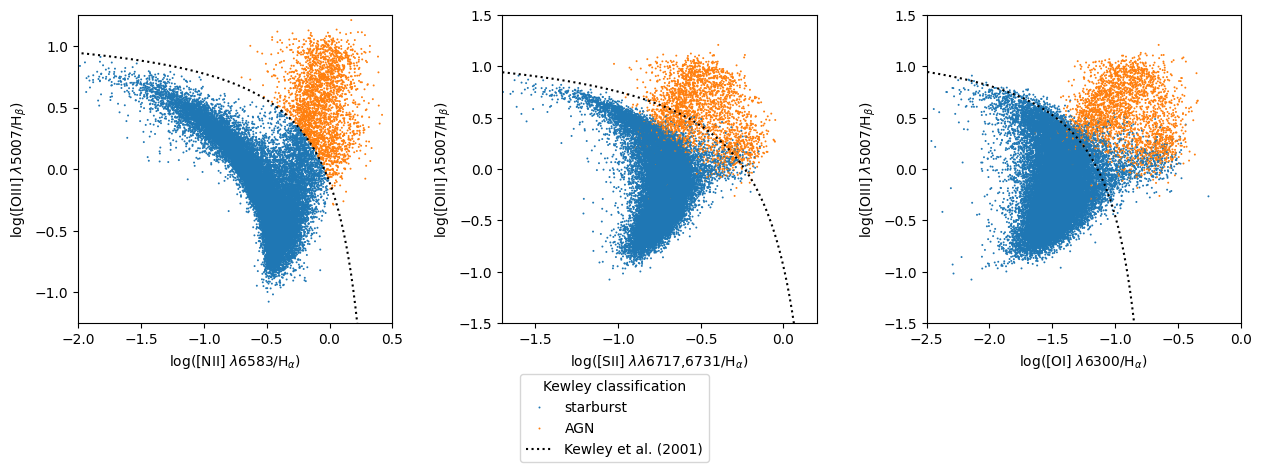

In [13]:
data['logsii/ha'] = np.log10(data['sii_6717_flux']/data['h_alpha_flux'])
data['logoi/ha'] = np.log10(data['oi_6300_flux']/data['h_alpha_flux'])

sii_x = np.linspace(-3.5,0.3, 1000)
oi_x = np.linspace(-6,-0.7, 1000)

kewley_from_sii = 0.72/(sii_x-0.32) +1.3
kewley_from_oi = 0.73/(oi_x+0.59) +1.33

fig, ax = plt.subplots(1,3, figsize=(15,4))
kewley_hue_order = ['starburst','AGN']

sns.scatterplot(data, x='lognii/ha',y='logoiii/hb', s=2, ax=ax[0],linewidth=0, hue='kewley_class', hue_order=kewley_hue_order)
ax[0].plot(kewley_x, kewley_logoiii_hb,'k:', color='black', label='Kewley et al. (2001)')
ax[0].set_xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
ax[0].set_ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')
ax[0].get_legend().set_visible(False)
ax[0].set_xlim(-2,0.5)
ax[0].set_ylim(-1.25,1.25)

sns.scatterplot(data, x='logsii/ha',y='logoiii/hb', s=2, color='red', ax=ax[1],linewidth=0, hue='kewley_class', hue_order=kewley_hue_order)
ax[1].plot(sii_x,kewley_from_sii,'k:', color='black', label='Kewley et al. (2001)')
ax[1].set_xlabel(r'log([SII] $\lambda$$\lambda$6717,6731/H$_\alpha$)')
ax[1].set_ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta}$)')
ax[1].get_legend().set_visible(False)
ax[1].set_xlim(-1.7,0.2)
ax[1].set_ylim(-1.5,1.5)

sns.scatterplot(data, x='logoi/ha',y='logoiii/hb', s=2, color='green', ax=ax[2],linewidth=0, hue='kewley_class', hue_order=kewley_hue_order)
ax[2].plot(oi_x,kewley_from_oi, 'k:', color='black', label='Kewley et al. (2001)')
ax[2].set_xlabel(r"log([OI] $\lambda$6300/H$_\alpha$)")
ax[2].set_ylabel(r"log([OIII] $\lambda$5007/H$_\beta$)")
ax[2].get_legend().set_visible(False)
ax[2].set_xlim(-2.5,0)
ax[2].set_ylim(-1.5,1.5)
    
lines, labels = ax[0].get_legend_handles_labels()
fig.legend(lines, labels,bbox_to_anchor=(0.55,0),title='Kewley classification')

plt.subplots_adjust(hspace=0.3, wspace=0.35)

plt.show()

##### Task (d) 
Make a WHAN diagram, the equivalent width of Hα (WHα) vs. [N II]/Hα ratio, for the
objects already classified (keep the same notation, i.e., the classification information
obtained in the BPT diagram). Comment and discuss the obtained results, give the
number/percentage of objects classified as (strong) AGN/Seyferts by the BPT and WHAN
diagrams.

In [14]:
# WHAN classification
data['h_alpha_eqw_abs'] = np.abs(data['h_alpha_eqw'])

data['WHAN_class'] = np.where((data['h_alpha_eqw_abs'] >0.5), "ELG", "lineless")

for i in data.index:
    if data.loc[i, 'h_alpha_eqw_abs'] > 0.5:
        if data.loc[i, 'WHAN_class'] != "lineless":
            if data.loc[i, 'h_alpha_eqw_abs'] > 3:
                if data.loc[i, 'lognii/ha'] > -0.4:
                    if data.loc[i, 'h_alpha_eqw_abs'] > 6:
                        data.loc[i, 'WHAN_subclass'] = "Seyfert"
                        data.loc[i, 'WHAN_class'] = "AGN"
                    else:
                        data.loc[i, 'WHAN_subclass'] = "wAGN"
                        data.loc[i, 'WHAN_class'] = "LINER"
                else:
                    data.loc[i, 'WHAN_subclass'] = "SFG" 
                    data.loc[i, 'WHAN_class'] = "SFG"           
            else:
                data.loc[i, 'WHAN_subclass'] = "RG"
                data.loc[i, 'WHAN_class'] = "LINER"
        else:
            data.loc[i, 'WHAN_subclass'] = "uncertain"
            data.loc[i, 'WHAN_class'] = "uncertain"
    else:
        data.loc[i, 'WHAN_class'] = "passive"

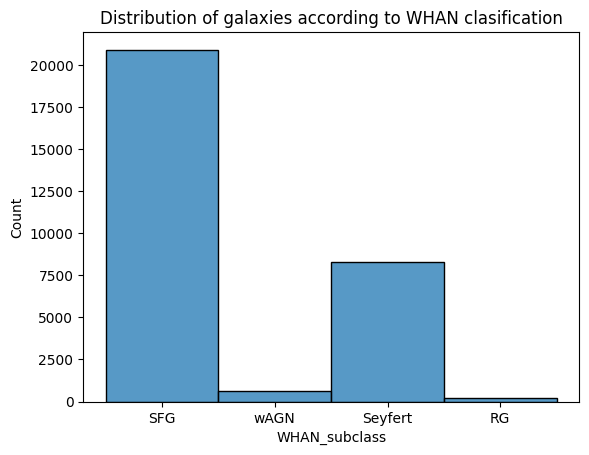

In [15]:
sns.histplot(data=data, x="WHAN_subclass", binwidth=0.1);
plt.title('Distribution of galaxies according to WHAN clasification');

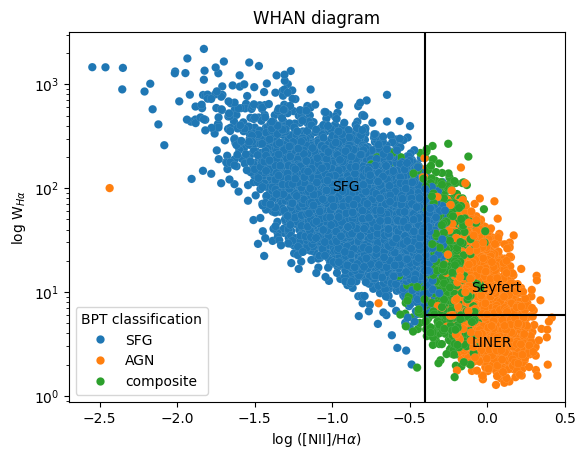

In [16]:
sns.scatterplot(data, x='lognii/ha',y='h_alpha_eqw_abs',linewidth=0.05, hue='BPT_class', hue_order=hue_order)

plt.axvline(x=-0.4, color='black')
plt.hlines(y=6, xmin=-0.4, xmax=0.5, color='black')
plt.annotate('Seyfert', xy=(-0.1,10), color='black')
plt.annotate('LINER', xy=(-0.1,3), color='black')
plt.annotate('SFG', xy=(-1,95), color='black')

plt.xlim(-2.7,0.5)
plt.yscale('log')

plt.title('WHAN diagram')
plt.xlabel(r"log ([NII]/H$\alpha$)")
plt.ylabel(r"log W$_{H\alpha}$")
plt.legend(title='BPT classification',loc='lower left')
plt.show()

- The classification of star-forming galaxies from the BPT and WHAN diagrams are quite consistent.
- This sample does not contain any passive galaxies.
- Most of the AGNs and the composite galaxies from the BPT diagram are classified as AGNs in the WHAN diagram. 
- Additionally, the WHAN diagram has differentiated the AGN class into distinct subclasses of the LINERs (weakly active galactic nucleus (wAGNs) & retired galaxies (RGs)) and Seyferts (Strong AGN).

In [17]:
print(f"Starburst galaxies in BPT: {data[(data.BPT_class =='SFG')].count()[0]/len(data) * 100} %"+
      f"\nStarburst galaxies in WHAN: {data[(data.WHAN_class=='SFG')].count()[0]/len(data) * 100} %")

Starburst galaxies in BPT: 78.96 %
Starburst galaxies in WHAN: 69.68333333333334 %


In [18]:
print(f"AGN in BPT: {data[(data.BPT_class =='AGN')].count()[0]/len(data) * 100} %"+
      f"\nAGN in WHAN: {data[(data.WHAN_class=='AGN')|(data.WHAN_class=='LINER')].count()[0]/len(data) * 100} %"+
      f"\nStrong AGN in WHAN: {data[(data.WHAN_subclass=='Seyfert')].count()[0]/len(data) * 100} %")

AGN in BPT: 8.656666666666666 %
AGN in WHAN: 30.316666666666663 %
Strong AGN in WHAN: 27.58 %


In [19]:
print(f"AGN in BPT and WHAN: {data[(data.BPT_class=='AGN') & (data.WHAN_class =='AGN')].count()[0]/len(data) * 100} %"+
      f"\nAGN in BPT but not WHAN: {data[(data.BPT_class =='AGN') & (data.WHAN_class!='AGN')].count()[0]/len(data) * 100} %"+
      f"\nAGN in WHAN but not BPT: {data[(data.BPT_class !='AGN') & (data.WHAN_class=='AGN')].count()[0]/len(data) * 100} %")

AGN in BPT and WHAN: 6.453333333333333 %
AGN in BPT but not WHAN: 2.203333333333333 %
AGN in WHAN but not BPT: 21.126666666666665 %


### TASK 2 (optional):
For a subsample of these SDSS objects, there are also [Ne III] $\lambda$3869 and [O II] $\lambda$3726,3729
line fluxes available (tip: set S/N ratio to at least 5). Extract that subsample from the first
sample, together with their g, z magnitudes and above line fluxes. Make the BPT and TBT
diagrams for this subsample, keeping the same notation (i.e., use the classification
information obtained in the BPT diagram for the TBT diagram). The observed magnitudes
should be transformed to the z=0 frame using k-correction (Chilingarian et al. 2010,
http://kcor.sai.msu.ru/ or Blanton & Roweis 2007, http://kcorrect.org/). The division line on
the TBT diagram is as follows:

$(g-z)_0 = -1.2 \times \log([\text{NeIII]/[OII]}) - 0.4$

where ($(g-z)_0$ is the rest-frame $g-z$ color, [NeIII] is the line flux of [Ne III] $\lambda$3869 and [OII] is the line flux of the [OII] $\lambda$3726,3729 doublet (sometimes labeled as [OII] $\lambda$3727 when the doublet
components are not resolved). Comment on what is the number/percentage of objects
defined as AGN by BPT, TBT and both BPT and TBT diagrams.

In [20]:
TBT_query = """select top 30000
s.plate, s.mjd, s.fiberid, s.z as redshift, g.subclass, g.e_bv_sfd,
l.h_alpha_flux, l.h_beta_flux, l.oiii_5007_flux, l.nii_6584_flux,
l.oi_6300_flux, l.sii_6717_flux, l.sii_6731_flux,
l.neiii_3869_flux, l.oii_3726_flux, l.oii_3729_flux,
l.h_alpha_eqw, l.nii_6584_eqw,
p.psfMag_g, p.psfMag_z
from SpecObjAll as s 
join GalSpecInfo as g on s.specobjid = g.specobjid 
join GalSpecLine as l on s.specobjid = l.specobjid
join PhotoObjAll as p on s.bestobjid = p.objid
where (s.class = "QSO" or s.class = "GALAXY")
and s.z < 0.3
and (l.sigma_balmer * 2.355) < 500
and l.h_alpha_flux > 0
and l.h_beta_flux > 0
and l.oiii_5007_flux > 0
and l.nii_6584_flux > 0
and l.oi_6300_flux > 0
and l.sii_6717_flux > 0
and l.sii_6731_flux > 0
and l.neiii_3869_flux > 0
and l.oii_3726_flux > 0
and l.oii_3729_flux > 0
and l.h_alpha_flux/l.h_alpha_flux_err > 5
and l.h_beta_flux/l.h_beta_flux_err > 5
and l.oiii_5007_flux/l.oiii_5007_flux_err > 5
and l.nii_6584_flux/l.nii_6584_flux_err > 5
and l.oi_6300_flux/l.oi_6300_flux_err > 5
and l.sii_6717_flux/l.sii_6717_flux_err > 5
and l.sii_6731_flux/l.sii_6731_flux_err > 5
and l.neiii_3869_flux/l.neiii_3869_flux_err > 5
and l.oii_3726_flux/l.oii_3726_flux_err > 5
and l.oii_3729_flux/l.oii_3729_flux_err > 5
and p.psfMag_g/p.psfMagErr_g > 5
and p.psfMag_z/p.psfMagErr_z > 5
"""

df_tbt = sdss.query_sql(TBT_query).to_pandas()


df_tbt.head()

/home/meghana/miniconda3/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


plate    mjd  fiberid  redshift                  subclass  e_bv_sfd  \
0    385  51877      457  0.090338              b'STARBURST'  0.029244   
1    390  51816      232  0.032806              b'STARBURST'  0.027313   
2    391  51782       66  0.121821                    b'AGN'  0.019972   
3    394  51913      261  0.044235  b'STARFORMING BROADLINE'  0.024790   
4    394  51913      385  0.211716              b'STARBURST'  0.023427   

   h_alpha_flux  h_beta_flux  oiii_5007_flux  nii_6584_flux  oi_6300_flux  \
0      712.9951     190.8663        240.3617      154.63200      20.05444   
1      577.4771     164.1368        330.9574       75.90610      25.65193   
2      577.6781     150.1794       1421.3100      463.83820      30.85235   
3      451.3723     125.1898        137.8656      322.49390     103.48370   
4      392.0780     110.6935        179.1071       94.58213      13.79511   

   sii_6717_flux  sii_6731_flux  neiii_3869_flux  oii_3726_flux  \
0      130.06510       98.87746         17.92816       243.9152   
1      119.88190       79.39220         30.88056       282.8521   
2      138.80180      112.63200        115.52470       107.5689   
3      253.26120      184.66670         24.26586       240.8324   
4       59.00201       43.03465         16.49701       132.3536   

   oii_3729_flux  h_alpha_eqw  nii_6584_eqw  psfMag_g  psfMag_z  
0       257.9444    -55.08408    -11.883530  18.95937  18.20772  
1       353.3259    -55.84763     -7.786438  19.48854  18.95751  
2       127.4564    -42.73833    -33.539390  19.56107  17.92469  
3       493.1639     -9.71596     -6.196424  18.05486  16.57099  
4       168.5451    -93.54205    -23.309400  19.99316  19.15442

In [21]:
df_tbt['logoiii/hb'] = np.log10(df_tbt['oiii_5007_flux']/df_tbt['h_beta_flux'])
df_tbt['lognii/ha'] = np.log10(df_tbt['nii_6584_flux']/df_tbt['h_alpha_flux'])

df_tbt['kewley_class']= np.where( np.logical_or(df_tbt['logoiii/hb']> (0.61/(df_tbt['lognii/ha']-0.47)+1.19), (df_tbt['lognii/ha']>0)) , 'AGN', 'starburst')
df_tbt['kaufmann_class'] = np.where( np.logical_or(df_tbt['logoiii/hb'] > (0.61/(df_tbt['lognii/ha']-0.05)+1.3), df_tbt['lognii/ha']>0), 'AGN', 'starburst')
df_tbt['BPT_class'] = np.where(((df_tbt['kaufmann_class']=='starburst')&(df_tbt['kewley_class']=='starburst')), "SFG", np.where(((df_tbt['kaufmann_class']=='AGN')&(df_tbt['kewley_class']=='AGN')), "AGN", "composite"))

In [22]:
from calc_kcor import calc_kcor

In [24]:
# k- correction
df_tbt['(g-z)_extcor'] = df_tbt['psfMag_g'] - df_tbt['psfMag_z'] - (3.303-1.263)*df_tbt['e_bv_sfd']
df_tbt['(g-z)_kcor'] = df_tbt['(g-z)_extcor'] - calc_kcor(filter_name='g', redshift=df_tbt['redshift'], colour_name='g - z', colour_value=df_tbt['(g-z)_extcor'])
df_tbt['logneiii_oii'] = np.log10(df_tbt["neiii_3869_flux"]/df_tbt["oii_3726_flux"])

/tmp/ipykernel_15629/4243433614.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k:" (-> color='k'). The keyword argument will take precedence.
  plt.plot(kewley_x, kewley_logoiii_hb,'k:', color='black',markersize=1, label='Kewley et al. (2001)')


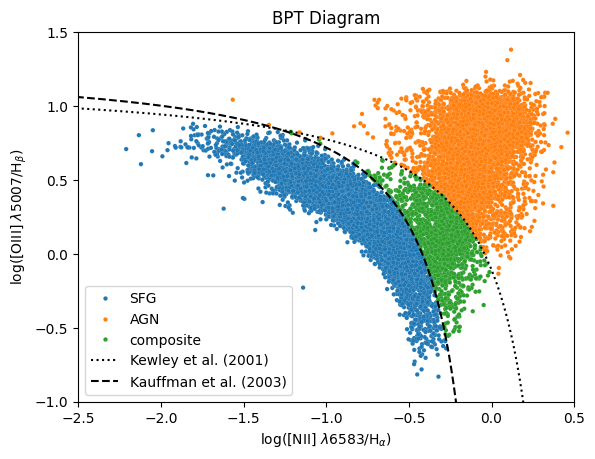

In [25]:
# BPT diagram of this sample
sns.scatterplot(df_tbt, x='lognii/ha',y='logoiii/hb', linewidth=0.07, s=10, hue='BPT_class')
plt.plot(kewley_x, kewley_logoiii_hb,'k:', color='black',markersize=1, label='Kewley et al. (2001)')
plt.plot(kauffman_x, kauffman_logoiii_hb, '--', color='black', label='Kauffman et al. (2003)')

plt.title(r'BPT Diagram')
plt.xlabel(r'log([NII] $\lambda 6583$/H$_{\alpha})$')
plt.ylabel(r'log([OIII] $\lambda 5007$/H$_{\beta})$')
plt.legend(title='BPT classification')

plt.xlim(-2.5,0.5)
plt.ylim(-1,1.5)
plt.legend()
plt.show()

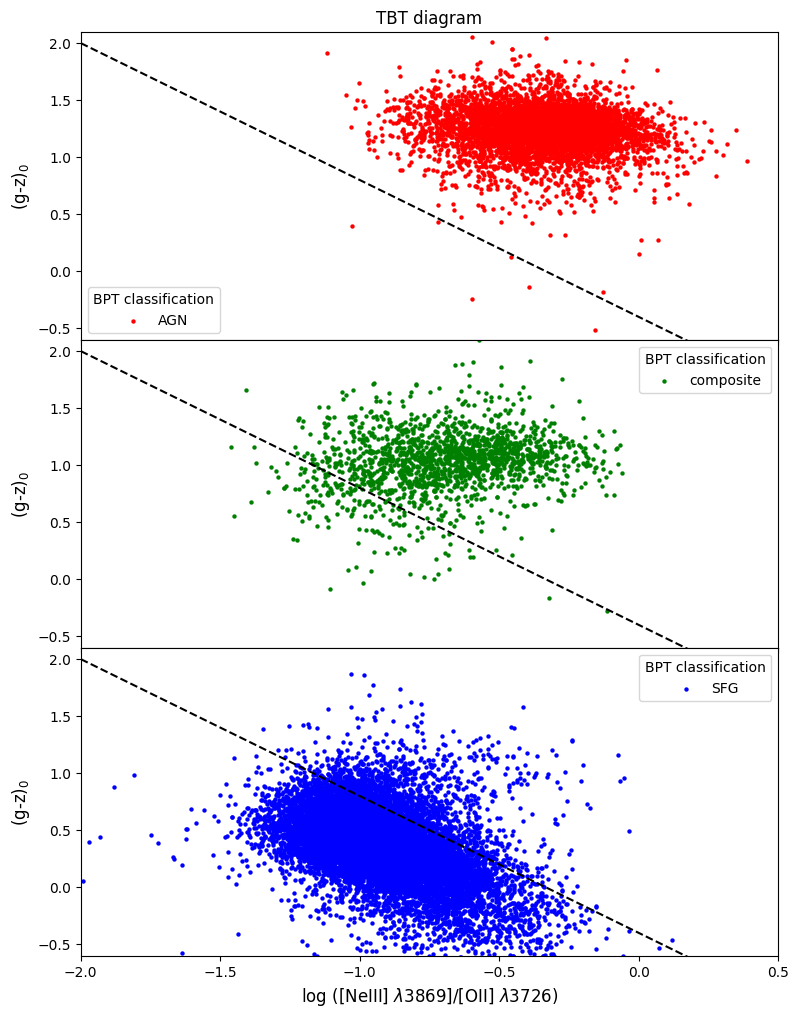

In [26]:
# TBT diagram

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(9,12), gridspec_kw=dict(height_ratios=[1, 1, 1]))
x = np.linspace(-2, 0.5, 1000)
y = -1.2*x - 0.4

tbt1=sns.scatterplot(df_tbt[df_tbt.BPT_class=='AGN'], x='logneiii_oii',y='(g-z)_kcor', linewidth=0, s=10, label='AGN', color='red', ax=ax[0])
ax[0].set_title('TBT diagram')
ax[0].set_ylabel("(g-z)$_0$", fontsize=12)
ax[0].legend(title="BPT classification")
ax[0].plot(x, y, 'k--')
ax[0].set_xlim(-2, 0.5)
ax[0].set_ylim(-0.6, 2.1)

tbt2=sns.scatterplot(df_tbt[df_tbt.BPT_class=='composite'], x='logneiii_oii',y='(g-z)_kcor', linewidth=0, s=10, label='composite',color='green', ax=ax[1])
ax[1].legend(title="BPT classification")
ax[1].plot(x, y, 'k--')
ax[1].set_ylabel("(g-z)$_0$", fontsize=12)
ax[1].set_xlim(-2, 0.5)
ax[1].set_ylim(-0.6, 2.1)

tbt3=sns.scatterplot(df_tbt[df_tbt.BPT_class=='SFG'], x='logneiii_oii',y='(g-z)_kcor', linewidth=0, s=10, label='SFG',color='blue', ax=ax[2])
ax[2].set_ylabel("(g-z)$_0$", fontsize=12)
ax[2].legend(title="BPT classification")
ax[2].plot(x, y, 'k--')
ax[2].set_xlabel(r"log ([NeIII] $\lambda$3869]/[OII] $\lambda$3726)", fontsize=12)
ax[2].set_xlim(-2, 0.5)
ax[2].set_ylim(-0.6, 2.1)

plt.subplots_adjust(hspace=.0)
plt.show()

In [27]:
df_tbt['TBT_class'] = np.where(((df_tbt['(g-z)_kcor']) > (-1.2*df_tbt['logneiii_oii']-0.1)), 'AGN', 'other')

In [28]:
print(f"AGN in BPT: {df_tbt[(df_tbt.BPT_class =='AGN')].count()[0]/len(df_tbt) * 100} %"
      f"\nAGN in TBT: {df_tbt[(df_tbt.TBT_class =='AGN')].count()[0]/len(df_tbt) * 100} %")

AGN in BPT: 26.588100028743895 %
AGN in TBT: 34.392066685829256 %


In [29]:
print(f"AGN in BPT and TBT: {df_tbt[(df_tbt.BPT_class =='AGN') & (df_tbt.TBT_class =='AGN')].count()[0]/len(df_tbt) * 100} %"+
      f"\nAGN in BPT but not TBT: {df_tbt[(df_tbt.BPT_class =='AGN') & (df_tbt.TBT_class !='AGN')].count()[0]/len(df_tbt) * 100} %"+
      f"\nAGN in TBT but not BPT: {df_tbt[(df_tbt.BPT_class !='AGN') & (df_tbt.TBT_class =='AGN')].count()[0]/len(df_tbt) * 100} %")

AGN in BPT and TBT: 26.473124461052027 %
AGN in BPT but not TBT: 0.11497556769186547 %
AGN in TBT but not BPT: 7.918942224777235 %


### TASK 3:

For sample of AGN selected from the SDSS database, find the WISE counterparts with a
matching tolerance of 3ʹʹ (∼ 0.5×FWHM of the WISE PSF at 3.4 μm), and get the three WISE
colors (W1,W2,W3). Locate the object on the WISE colour-colour plot using the selection
criteria defined by Mateos et al. (2012, 2013):

$y = 0.315 × x$

$x ≡ log_{10}(f_{12\mu m}/f_{4.6\mu m})$

$y ≡ log_{10}(f_{4.6\mu m}/f_{3.4\mu m})$


The top and bottom boundaries of the wedge are obtained by adding y-axis intercepts of
+0.297 and −0.110, respectively. The MIR power-law $\alpha=−0.3$ bottom-left limit corresponds to:

$y = −3.172 × x + 0.436$

Plot your results on top of the Figure 12 taken from Wright et al. (2010).
Comment on what is the percentage of object found in both SDSS and WISE survey, what is
the number/percentage of objects defined as AGN by SDSS and WISE, as well as what is the
number/percentage of objects found to be AGN by both surveys.

In [30]:
wise_query = """SELECT
s.plate, s.mjd, s.fiberid, s.z as redshift, g.subclass,
w.w1mpro as w1, w.w2mpro as w2, w.w3mpro as w3, w.w1flux, w.w2flux, w.w3flux
from SpecObjAll as s
join GalSpecInfo as g on s.specobjid = g.specobjid 
join GalSpecLine as l on s.specobjid = l.specobjid	
join wise_xmatch as x on s.bestobjid = x.sdss_objid
join wise_allsky as w on x.wise_cntr = w.cntr
where (s.class = "QSO" or s.class = "GALAXY")
and s.z < 0.35
and (l.sigma_balmer * 2.355) < 500
and x.match_dist <= 3
and w.w1snr > 5
and w.w2snr > 5
and w.w3snr > 5
and w.w1flux/w.w1sigflux > 5
and w.w2flux/w.w2sigflux > 5
and w.w3flux/w.w3sigflux > 5"""

df_wise = sdss.query_sql(wise_query, timeout=500).to_pandas()


df_wise.head()

/home/meghana/miniconda3/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


plate    mjd  fiberid  redshift        subclass      w1      w2      w3  \
0   1705  53848       81  0.160055             b''  13.817  13.591  11.890   
1   1705  53848      143  0.096742             b''  15.320  15.089  12.048   
2   1705  53848      171  0.059140             b''  13.858  13.732  11.457   
3   1705  53848      223  0.135559  b'STARFORMING'  14.532  14.089  10.019   
4   1705  53848      311  0.148951             b''  14.120  13.757  10.852   

   w1flux  w2flux   w3flux  
0  471.38  231.05   277.97  
1  118.05   58.12   240.31  
2  453.61  202.90   414.36  
3  243.94  145.99  1557.00  
4  356.57  198.32   723.04

In [31]:
df_wise = pd.merge(df_wise, data, on=['plate', 'mjd', 'fiberid'])
df_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25282 entries, 0 to 25281
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   plate            25282 non-null  int64   
 1   mjd              25282 non-null  int64   
 2   fiberid          25282 non-null  int64   
 3   redshift_x       25282 non-null  float64 
 4   subclass_x       25282 non-null  object  
 5   w1               25282 non-null  float64 
 6   w2               25282 non-null  float64 
 7   w3               25282 non-null  float64 
 8   w1flux           25282 non-null  float64 
 9   w2flux           25282 non-null  float64 
 10  w3flux           25282 non-null  float64 
 11  specobjid        25282 non-null  int64   
 12  redshift_y       25282 non-null  float64 
 13  subclass_y       25282 non-null  object  
 14  oiii_5007_flux   25282 non-null  float64 
 15  h_beta_flux      25282 non-null  float64 
 16  h_alpha_flux     25282 non-null  float64

In [32]:
df_wise['w1_w2'] = df_wise.w1 - df_wise.w2
df_wise['w2_w3'] = df_wise.w2 - df_wise.w3
df_wise['wise_class'] = ''

for i in range(len(df_wise)):
    if df_wise['w1_w2'][i] > 0.8:
        df_wise['wise_class'][i] = 'AGN'
    elif df_wise['w2_w3'][i] < 2:
        df_wise['wise_class'][i] = 'Spheroids'
    elif df_wise['w2_w3'][i] > 2 and df_wise['w2_w3'][i] < 3.5:
        df_wise['wise_class'][i] = 'Intermediate Disks'
    elif df_wise['w2_w3'][i] > 3.5:
        df_wise['wise_class'][i] = 'SF Disks'
        
df_wise['wise_class'] = df_wise['wise_class'].astype(str)

/tmp/ipykernel_15629/1699787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wise['wise_class'][i] = 'AGN'
/tmp/ipykernel_15629/1699787.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wise['wise_class'][i] = 'Intermediate Disks'
/tmp/ipykernel_15629/1699787.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wise['wise_class'][i] = 'SF Disks'
/tmp/ipykernel_15629/1699787.py:9: SettingWithCopyWarning: 
A value is tryi

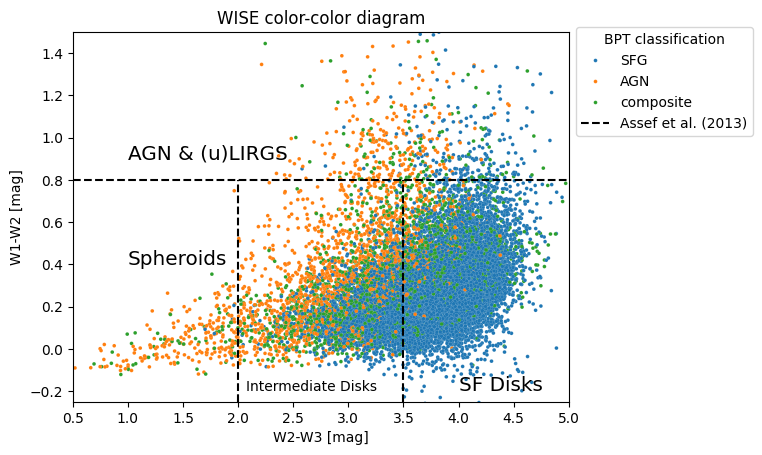

In [33]:
# color-color diagram
ax = sns.scatterplot(x = 'w2_w3', y='w1_w2',data=df_wise,s=7, hue='BPT_class',linewidth=0.07, hue_order=hue_order)

ax.vlines(2, -0.25, 0.8, linestyle='--', color='black', label='Assef et al. (2013)')
ax.vlines(3.5, -0.25, 0.8, linestyle='--', color='black')
plt.axhline(0.8,linestyle='--', color='black')

plt.title(r'WISE color-color diagram')
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

plt.text(1,0.9, 'AGN & (u)LIRGS',  fontsize='x-large')
plt.text(1,0.4, 'Spheroids',  fontsize='x-large')
plt.text(2.07,-0.2, 'Intermediate Disks')
plt.text(4,-0.2, 'SF Disks', fontsize='x-large')

plt.xlim(0.5,5)
plt.ylim(-0.25,1.5)
plt.legend(title='BPT classification', bbox_to_anchor=(1, 0.7))

plt.show()

In [34]:
# AGN wedge Matteos+2012

# in terms of the colors
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
x_cent = (7.624)/(0.315+3.172)

def x_range(x): return np.linspace(x, np.max(df_wise['w2_w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

mat_y_top = 0.315*x_range(x_top) +0.796
mat_y_bot = 0.315*x_range(x_bot) -0.222
mat_y_cent = 0.315*x_range(x_cent)
mat_y_lim= -3.172*x_lim+7.624

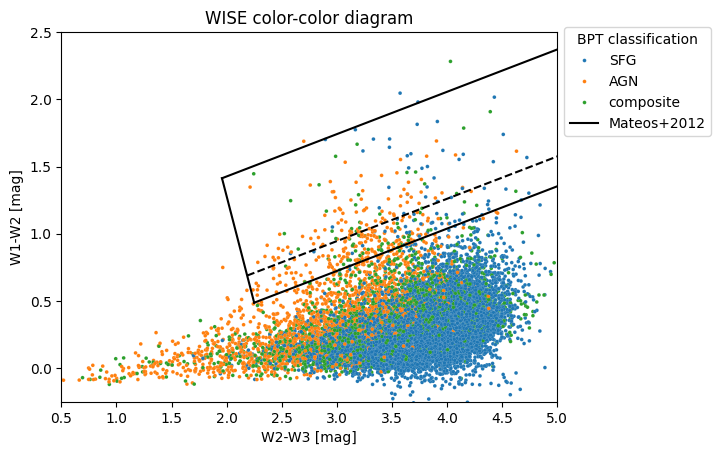

In [35]:
ax = sns.scatterplot(x = 'w2_w3', y='w1_w2',data=df_wise,s=7, hue='BPT_class',linewidth=0.07, hue_order=hue_order)

plt.plot(x_range(x_top),mat_y_top, color='black', label='Mateos+2012')
plt.plot(x_range(x_bot),mat_y_bot, color='black')
plt.plot(x_range(x_cent),mat_y_cent, color='black', linestyle='dashed')
plt.plot(x_lim,mat_y_lim, color='black')

plt.title(r'WISE color-color diagram')
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

plt.xlim(0.5,5)
plt.ylim(-0.25,2.5)
plt.legend(title='BPT classification', bbox_to_anchor=(1, 0.7))
plt.show()

In [36]:
# AGN wedge

def y_top(x): return 0.315*x+0.796 
def y_bot(x): return 0.315*x-0.222 
def y_lim(x): return -3.172*x+7.624

for i, x, y in zip(df_wise.index, df_wise['w2_w3'], df_wise['w1_w2']):
    if y <= y_top(x) and y > y_lim(x) and y > y_bot(x):
        df_wise.loc[i, 'mateos_class'] = "AGN"
    else:
        df_wise.loc[i, 'mateos_class'] = "other"
        
df_wise['mateos_class'].value_counts()

mateos_class
other    24918
AGN        364
Name: count, dtype: int64

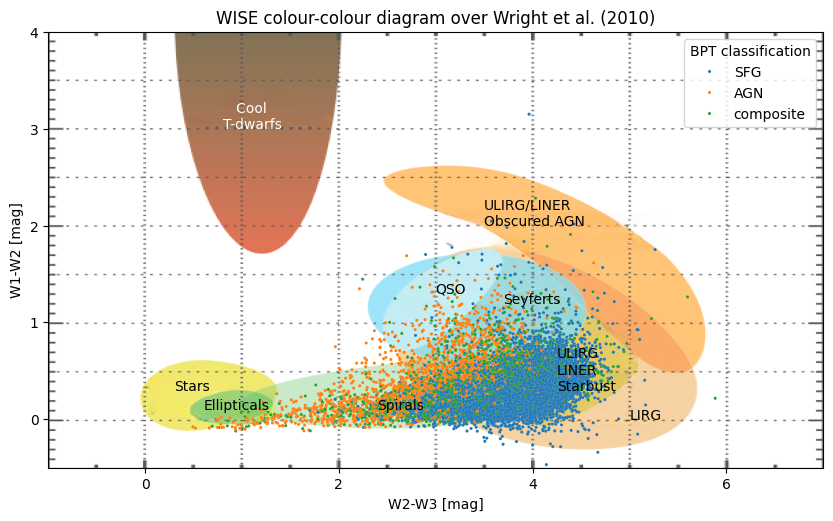

In [37]:
# results on top of the Figure 12 taken from Wright et al. (2010)
fig, ax = plt.subplots(1,1,figsize=(10,10))

img = plt.imread('wright+2010_cleanup.png')
plt.imshow(img, zorder=0, extent=[-1.009, 7, -0.510, 4], alpha=0.75, aspect='equal')

sns.scatterplot(df_wise, x='w2_w3',y='w1_w2',  hue='BPT_class', hue_order=hue_order, zorder=1, ax=ax, linewidth=0.05, s=5)

plt.annotate('   Cool\nT-dwarfs', xy=(0.8,3), color='white')
plt.annotate('Ellipticals', xy=(0.6,0.1), color='black')
plt.annotate('Stars', xy=(0.3,0.3), color='black')
plt.annotate('Spirals', xy=(2.4,0.1), color='black')
plt.annotate('QSO', xy=(3,1.3), color='black')
plt.annotate('Seyferts', xy=(3.7,1.2), color='black')
plt.annotate('ULIRG\nLINER\nStarbust', xy=(4.25,0.3), color='black')
plt.annotate('LIRG', xy=(5,0), color='black')
plt.annotate('ULIRG/LINER\nObscured AGN', xy=(3.5,2), color='black')

plt.xlim(-1,7)
plt.xticks(np.arange(0, 7, 2))
plt.yticks(np.arange(0, 5, 1))
plt.ylim(-0.5,4)

plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')
plt.title("WISE colour-colour diagram over Wright et al. (2010)")

plt.legend(title='BPT classification')
plt.show()

In [38]:
print(f"AGN in BPT: {df_wise[(df_wise.BPT_class =='AGN')].count()[0]/len(df_wise) * 100} %"+
      f"\nAGN in WISE: {df_wise[(df_wise.wise_class =='AGN')].count()[0]/len(df_wise) * 100} %"+
      f"\nAGN in Mateos: {df_wise[(df_wise.mateos_class =='AGN')].count()[0]/len(df_wise) * 100} %")

AGN in BPT: 9.20417688474013 %
AGN in WISE: 2.2545684676845186 %
AGN in Mateos: 1.4397595126967804 %


In [39]:
# SDSS vs WISE
print(f"AGN in BPT and WISE: {df_wise[(df_wise.BPT_class =='AGN') & (df_wise.wise_class =='AGN')].count()[0]/len(df_wise) * 100} %"+
      f"\nAGN in BPT but not WISE: {df_wise[(df_wise.BPT_class =='AGN') & (df_wise.wise_class !='AGN')].count()[0]/len(df_wise) * 100} %"+
      f"\nAGN in WISE but not BPT: {df_wise[(df_wise.BPT_class !='AGN') & (df_wise.wise_class =='AGN')].count()[0]/len(df_wise) * 100} %")

AGN in BPT and WISE: 0.9374258365635629 %
AGN in BPT but not WISE: 8.266751048176568 %
AGN in WISE but not BPT: 1.3171426311209555 %


Low overlap between objects classified as AGNs using SDSS and WISE. There was also a reduction of the sample size while cross-matching the objects between both surveys. More objects classified as AGNs using SDSS were not classified as the same using WISE.

Comparing this with the classification according to Mateos et al. (2012, 2013):

In [40]:
print(f"\nAGN in WISE and Mateos: {df_wise[(df_wise.wise_class =='AGN') & (df_wise.mateos_class =='AGN')].count()[0]/len(df_wise) * 100} %")


AGN in WISE and Mateos: 1.2775887983545606 %


In [41]:
print(f"AGN in BPT and Mateos: {df_wise[(df_wise.BPT_class =='AGN') & (df_wise.mateos_class =='AGN')].count()[0]/len(df_wise) * 100} %"+
      f"\nAGN in BPT but not Mateos: {df_wise[(df_wise.BPT_class =='AGN') & (df_wise.mateos_class !='AGN')].count()[0]/len(df_wise) * 100} %"+
      f"\nAGN in Mateos but not BPT: {df_wise[(df_wise.BPT_class !='AGN') & (df_wise.mateos_class =='AGN')].count()[0]/len(df_wise) * 100} %")

AGN in BPT and Mateos: 0.889961237243889 %
AGN in BPT but not Mateos: 8.314215647496242 %
AGN in Mateos but not BPT: 0.5497982754528914 %


In [42]:
print(f"AGN in BPT, WISE and Mateos: {df_wise[(df_wise.BPT_class =='AGN') & (df_wise.wise_class =='AGN') & (df_wise.mateos_class =='AGN')].count()[0]/len(df_wise) * 100} %")

AGN in BPT, WISE and Mateos: 0.7396566727315877 %


### TASK 4:
From a catalogue of SDSS Stripe82$^1$ variable sources select a sample (at least 10) of quasar
(type 1 AGN) light curve and test the QNPy package, for quasar light curves modeling using
Conditional Neural Processes (follow tutorial without clustering, tip: check the demo workshop
from SER-SAG-S1). For each light curve provide a basic info-sheet with: number of points,
number of gaps (think of a metric to identify gaps), mean and median sampling,
maximal/minimal/mean/median magnitude, variability amplitude. Comment on how well the
QNPy models the light curve based on the above listed light curve parameters.

$^1$Optionally you can find other data sets to test the code, e.g. ZTF, TESS, etc.

In [43]:
# ! pip install QNPy

A catalogue of SDSS Stripe82 containing recalibrated light curves for all spectroscopically confirmed QSOs were obtained from:
http://faculty.washington.edu/ivezic/sdss/catalogs/S82variables.html

To model the light curves for 10 objects chosen from the above sample, the steps to be taken are:
- Preprocessing
- Splitting and Training
- Predictions and plotting

### Preprocess

In [44]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [46]:
#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 

path = '/home/meghana/Documents/mass/agn/final_project/stripe82' #path to data
dat_files = glob.glob(path + "/*.dat")

for file in dat_files:
    data = pd.read_csv(file,names=['mjd','filter','mag','magerr'],sep='\s+')
    data = data[data['filter'] == 'r']
    data=data.drop(columns='filter', axis=1)
    data.mjd=data.mjd.str.replace('#', '')

    filename = os.path.splitext(os.path.basename(file).split('/')[-1])[0]
    data.to_csv('./qnpy_files/light_curves/%s.csv'%filename)
data.head()

mjd     mag  magerr
0   51081.416961  18.546   0.009
5   51818.402927  18.476   0.009
10  51875.231920  18.387   0.008
15  52171.391022  18.451   0.009
20  52171.464344  18.450   0.008

In [48]:
#Cleaning the outliers first approach
# This function cleans data in CSV files, removing outliers based on a specified threshold, 
#and saves the cleaned files without aggregating time and fluxes.

input_folder = './qnpy_files/light_curves'
output_folder = './light_curves_clean'
threshold = 3.0

outliers=pr.clean_and_save_outliers(input_folder, output_folder, threshold=threshold)

Cleaned and saved LC_2579983.csv to ./light_curves_clean/LC_2579983.csv
Cleaned and saved LC_3032591.csv to ./light_curves_clean/LC_3032591.csv
Cleaned and saved LC_3097526.csv to ./light_curves_clean/LC_3097526.csv
Cleaned and saved LC_3078106.csv to ./light_curves_clean/LC_3078106.csv
Cleaned and saved LC_3102202.csv to ./light_curves_clean/LC_3102202.csv
Cleaned and saved LC_3104329.csv to ./light_curves_clean/LC_3104329.csv
Cleaned and saved LC_2473812.csv to ./light_curves_clean/LC_2473812.csv
Cleaned and saved LC_3844725.csv to ./light_curves_clean/LC_3844725.csv
Cleaned and saved LC_2524327.csv to ./light_curves_clean/LC_2524327.csv
Cleaned and saved LC_3152786.csv to ./light_curves_clean/LC_3152786.csv


In [50]:
#Path to Padded Data
DATA_SRC = "./qnpy_files/Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./qnpy_files/preproc" 

In [51]:
# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 

padding= pr.backward_pad_curves(output_folder, DATA_SRC, desired_observations=100)

Created new file: ./qnpy_files/Padded_lc/LC_2579983.csv
Created new file: ./qnpy_files/Padded_lc/LC_3032591.csv
Created new file: ./qnpy_files/Padded_lc/LC_3097526.csv
Created new file: ./qnpy_files/Padded_lc/LC_3078106.csv
Created new file: ./qnpy_files/Padded_lc/LC_3102202.csv
Created new file: ./qnpy_files/Padded_lc/LC_3104329.csv
Created new file: ./qnpy_files/Padded_lc/LC_2473812.csv
Created new file: ./qnpy_files/Padded_lc/LC_3844725.csv
Created new file: ./qnpy_files/Padded_lc/LC_2524327.csv
Created new file: ./qnpy_files/Padded_lc/LC_3152786.csv


In [52]:
# making corrections to the columns of the new light curve files
csv_files = glob.glob(DATA_SRC + "/*.csv")
for file in csv_files:
    data = pd.read_csv(file)
    data['mjd'], data['mag'], data['magerr'] = data['Unnamed: 0'], data['mjd'], data['mag']
    data = data.drop(columns='Unnamed: 0', axis=1)
    data.to_csv(file)
data.head()

mjd     mag  magerr
0  51081.417441  19.765   0.021
1  51818.403452  19.841   0.020
2  51875.232400  19.747   0.020
3  52171.391502  19.764   0.019
4  52171.464849  19.734   0.017

In [53]:
#listing the data that are going to be transformed. 
files = os.listdir(DATA_SRC)

In [54]:
#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

In [55]:
trcoeff

[['LC_2579983', 51075.422538, 54412.378713, 18.586, 19.123],
 ['LC_3032591', 51081.416961, 54412.38945, 18.369, 18.581],
 ['LC_3097526', 51075.42387, 54412.379986, 19.854, 20.361],
 ['LC_3078106', 51075.431537, 54412.387647, 19.564, 20.12],
 ['LC_3102202', 51075.435413, 54412.391573, 19.807, 20.401],
 ['LC_3104329', 51081.408267, 54412.380653, 18.874, 19.398],
 ['LC_2473812', 51081.404271, 54412.376697, 17.551, 17.948],
 ['LC_3844725', 51075.438598, 54412.394702, 19.436, 20.08],
 ['LC_2524327', 51075.411122, 54412.367238, 18.235, 18.555],
 ['LC_3152786', 51081.417441, 54412.389911, 19.637, 20.233]]

### Splitting and training

In [56]:
import QNPy #Importing the package
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

In [58]:
DATA_SRC = "./qnpy_files/preproc" #Path to transformed data
files = os.listdir(DATA_SRC) #listing the transformed data

In [61]:
#creating the folders for saving the splitted data
st.create_split_folders(train_folder='./qnpy_files/dataset/train/', test_folder='./qnpy_files/dataset/test/', val_folder='./qnpy_files/dataset/val/')

In [62]:
#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 

TRAIN_FOLDER = './qnpy_files/dataset/train/'
TEST_FOLDER = './qnpy_files/dataset/test/'
VAL_FOLDER = './qnpy_files/dataset/val/'

In [63]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 153.22it/s]


In [90]:
DATA_PATH_TRAIN = "./qnpy_files/dataset/train" #path to train folder
DATA_PATH_VAL = "./qnpy_files/dataset/val" #path to val folder
DATA_PATH_TEST = "./qnpy_files/dataset/test/"
MODEL_PATH = "./qnpy_files/output/cnp_model.pth" #path for saving model

In [65]:
BATCH_SIZE=32 #Defining the batch size, it should remain 32

In [66]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE)

In [68]:
#runing the function fo creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [69]:
st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 1000, 500, mseMetric, maeMetric, device)

100%|███████████████████████████████████████| 1000/1000 [01:20<00:00, 12.36it/s]


([[172.5507049560547,
   172.43319702148438,
   128.06906127929688,
   191.17311096191406,
   135.8484649658203,
   180.87904357910156,
   163.62124633789062,
   141.99783325195312,
   184.0164794921875,
   188.9385223388672,
   145.72581481933594,
   171.33729553222656,
   146.75680541992188,
   169.2089080810547,
   141.20668029785156,
   150.3308563232422,
   168.88458251953125,
   137.23695373535156,
   140.7936553955078,
   178.00949096679688,
   140.5887908935547,
   157.99183654785156,
   149.60081481933594,
   161.7684326171875,
   170.10133361816406,
   171.74720764160156,
   189.4252166748047,
   159.9512176513672,
   164.4110107421875,
   159.71121215820312,
   174.92686462402344,
   143.6043701171875,
   132.92962646484375,
   151.54287719726562,
   163.82334899902344,
   159.06800842285156,
   135.32638549804688,
   172.64710998535156,
   146.59825134277344,
   117.39266204833984,
   146.3326873779297,
   175.88809204101562,
   177.32516479492188,
   152.99990844726562,
  

In [70]:
#function for training the data
#1 - number of train_model function runs
#3000 - number of epochs
#2000 - number of early stopping limit

history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 1000, 500, mseMetric, maeMetric, device)

100%|███████████████████████████████████████| 1000/1000 [01:20<00:00, 12.38it/s]


In [72]:
# Define the file names for saving the lists for all histories
file_names = ["./qnpy_files/history_loss_train.csv", "./qnpy_files/history_loss_val.csv", "./qnpy_files/history_mse_train.csv", "./qnpy_files/history_mse_val.csv",
              "./qnpy_files/history_mae_train.csv", "./qnpy_files/history_mae_val.csv", "./qnpy_files/epoch_counter_train_loss.csv",
              "./qnpy_files/epoch_counter_train_mse.csv", "./qnpy_files/epoch_counter_train_mae.csv", "./qnpy_files/epoch_counter_val_loss.csv",
              "./qnpy_files/epoch_counter_val_mse.csv", "./qnpy_files/epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [76]:
history_loss_train_file = './qnpy_files/history_loss_train.csv'  
history_loss_val_file = './qnpy_files/history_loss_val.csv'  
epoch_counter_train_loss_file = './qnpy_files/epoch_counter_train_loss.csv'  


history_mse_train_file = './qnpy_files/history_mse_train.csv'
history_mse_val_file = './qnpy_files/history_mse_val.csv'  
epoch_counter_train_mse_file = './qnpy_files/epoch_counter_train_mse.csv' 


history_mae_train_file = './qnpy_files/history_mae_train.csv'
history_mae_val_file = './qnpy_files/history_mae_val.csv'  
epoch_counter_train_mae_file = './qnpy_files/epoch_counter_train_mae.csv'  


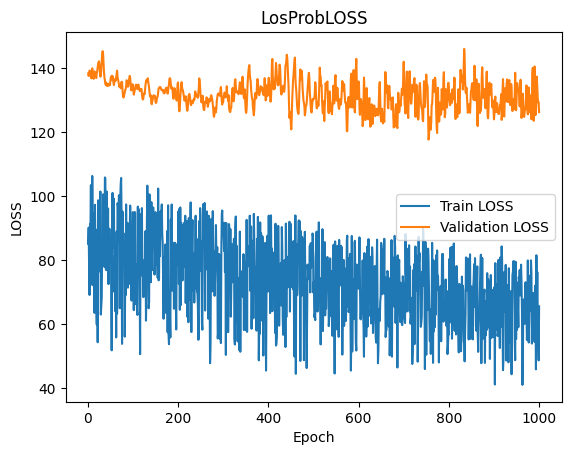

In [74]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

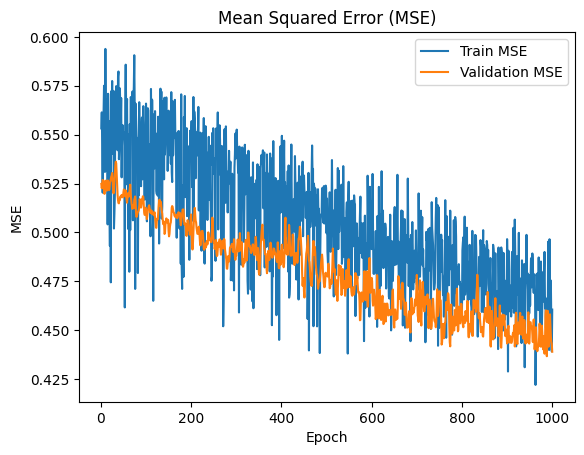

In [77]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

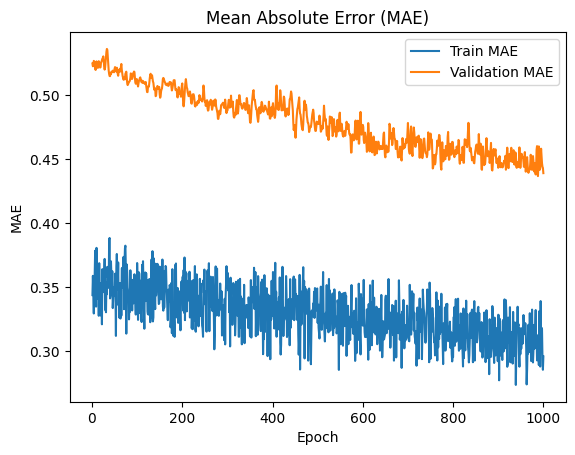

In [78]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

### Prediction and ploting

In [79]:
import QNPy #Importing the package
#Importing PREDICTION_onePDF_original_mjd module from the package
from QNPy import PREDICTION_onePDF_original_mjd as pop
#Importing all packages from PREDICTION_onePDF_original_mjd module
from QNPy.PREDICTION_onePDF_original_mjd import * 
#The functions plot_function2, back_x, back_y and find_LC_transorm must be imported separately
from QNPy.PREDICTION_onePDF_original_mjd import plot_function2, back_x, back_y, find_LC_transform 

In [97]:
# Creating all needed folders
pop.create_prediction_folders()

OUTPUT_PATH = "output/predictions/" #path where to save the plots and data

Created folder: ./output/predictions/train
Created folder: ./output/predictions/train/plots
Created folder: ./output/predictions/train/data
Created folder: ./output/predictions/test
Created folder: ./output/predictions/test/plots
Created folder: ./output/predictions/test/data
Created folder: ./output/predictions/val
Created folder: ./output/predictions/val/plots
Created folder: ./output/predictions/val/data


In [98]:
clearfolders=pop.clear_output_dir(OUTPUT_PATH)#clearing the output directorium, it can be sciped
criterion, mseMetric=pop.get_criteria()#loading criterion adn metrics

In [99]:
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./qnpy_files/dataset/test"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_3078106_original_split0.csv
Removed padding in file: LC_3152786_original_split22.csv
Removed padding in file: LC_3032591_original_split18.csv


In [100]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./qnpy_files/dataset/train"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_3102202_original_split26.csv
Removed padding in file: LC_3844725_original_split1.csv
Removed padding in file: LC_2524327_original_split25.csv
Removed padding in file: LC_3104329_original_split20.csv
Removed padding in file: LC_3097526_original_split4.csv


In [101]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./qnpy_files/dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: LC_2579983_original_split29.csv
Removed padding in file: LC_2473812_original_split17.csv


In [102]:
tr=pop.load_trcoeff()#loading the transformation coeff

In [103]:
testSet, testLoader=pop.load_test_data(DATA_PATH_TEST)#loading test data
trainSet, trainLoader=pop.load_train_data(DATA_PATH_TRAIN)#loading train data
valSet, valLoader = pop.load_val_data(DATA_PATH_VAL)#loading validation data

  0%|                                                     | 0/3 [00:00<?, ?it/s]/home/meghana/.local/lib/python3.10/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:406: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 20.97it/s]


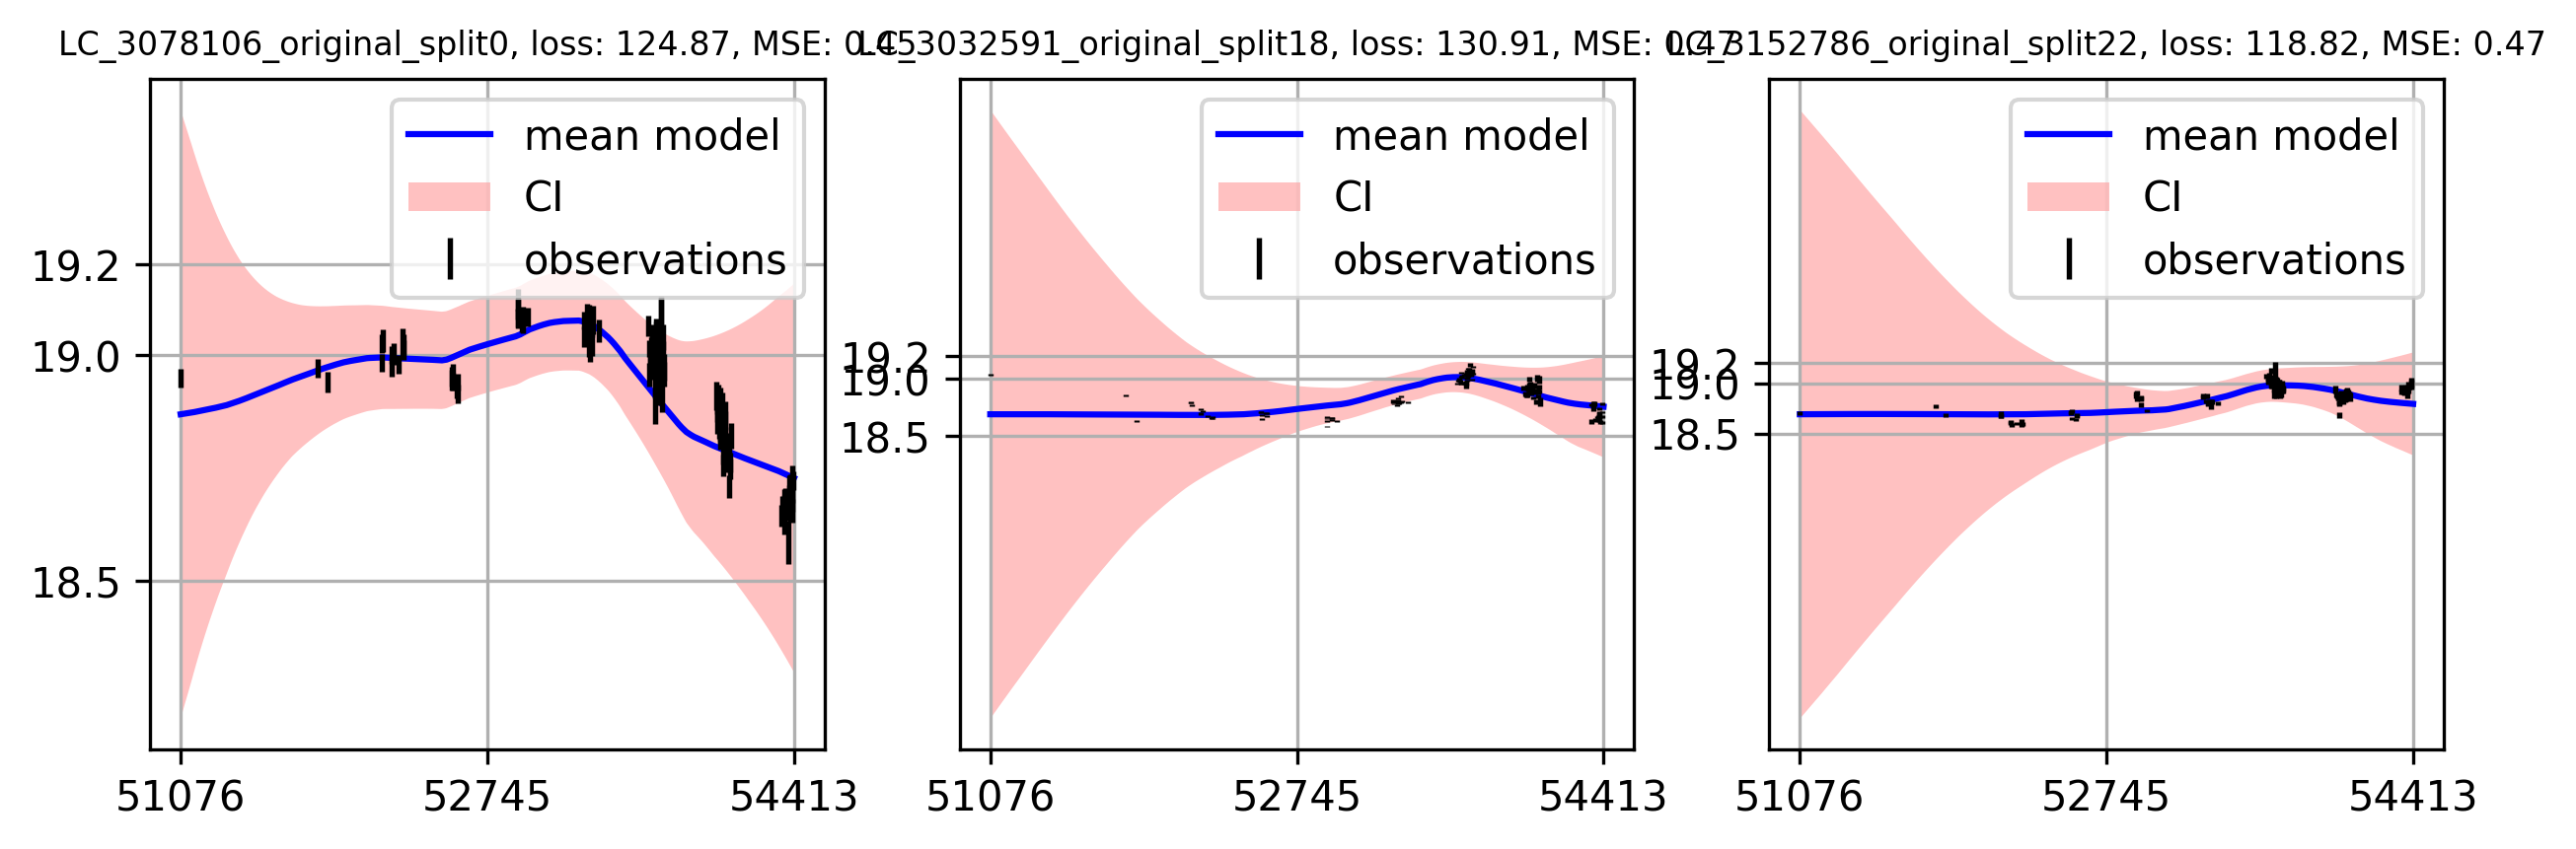

In [104]:
#prediction and plotting od test data
testMetrics=pop.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function2, device,tr)

  0%|                                                     | 0/5 [00:00<?, ?it/s]/home/meghana/.local/lib/python3.10/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:524: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 22.37it/s]


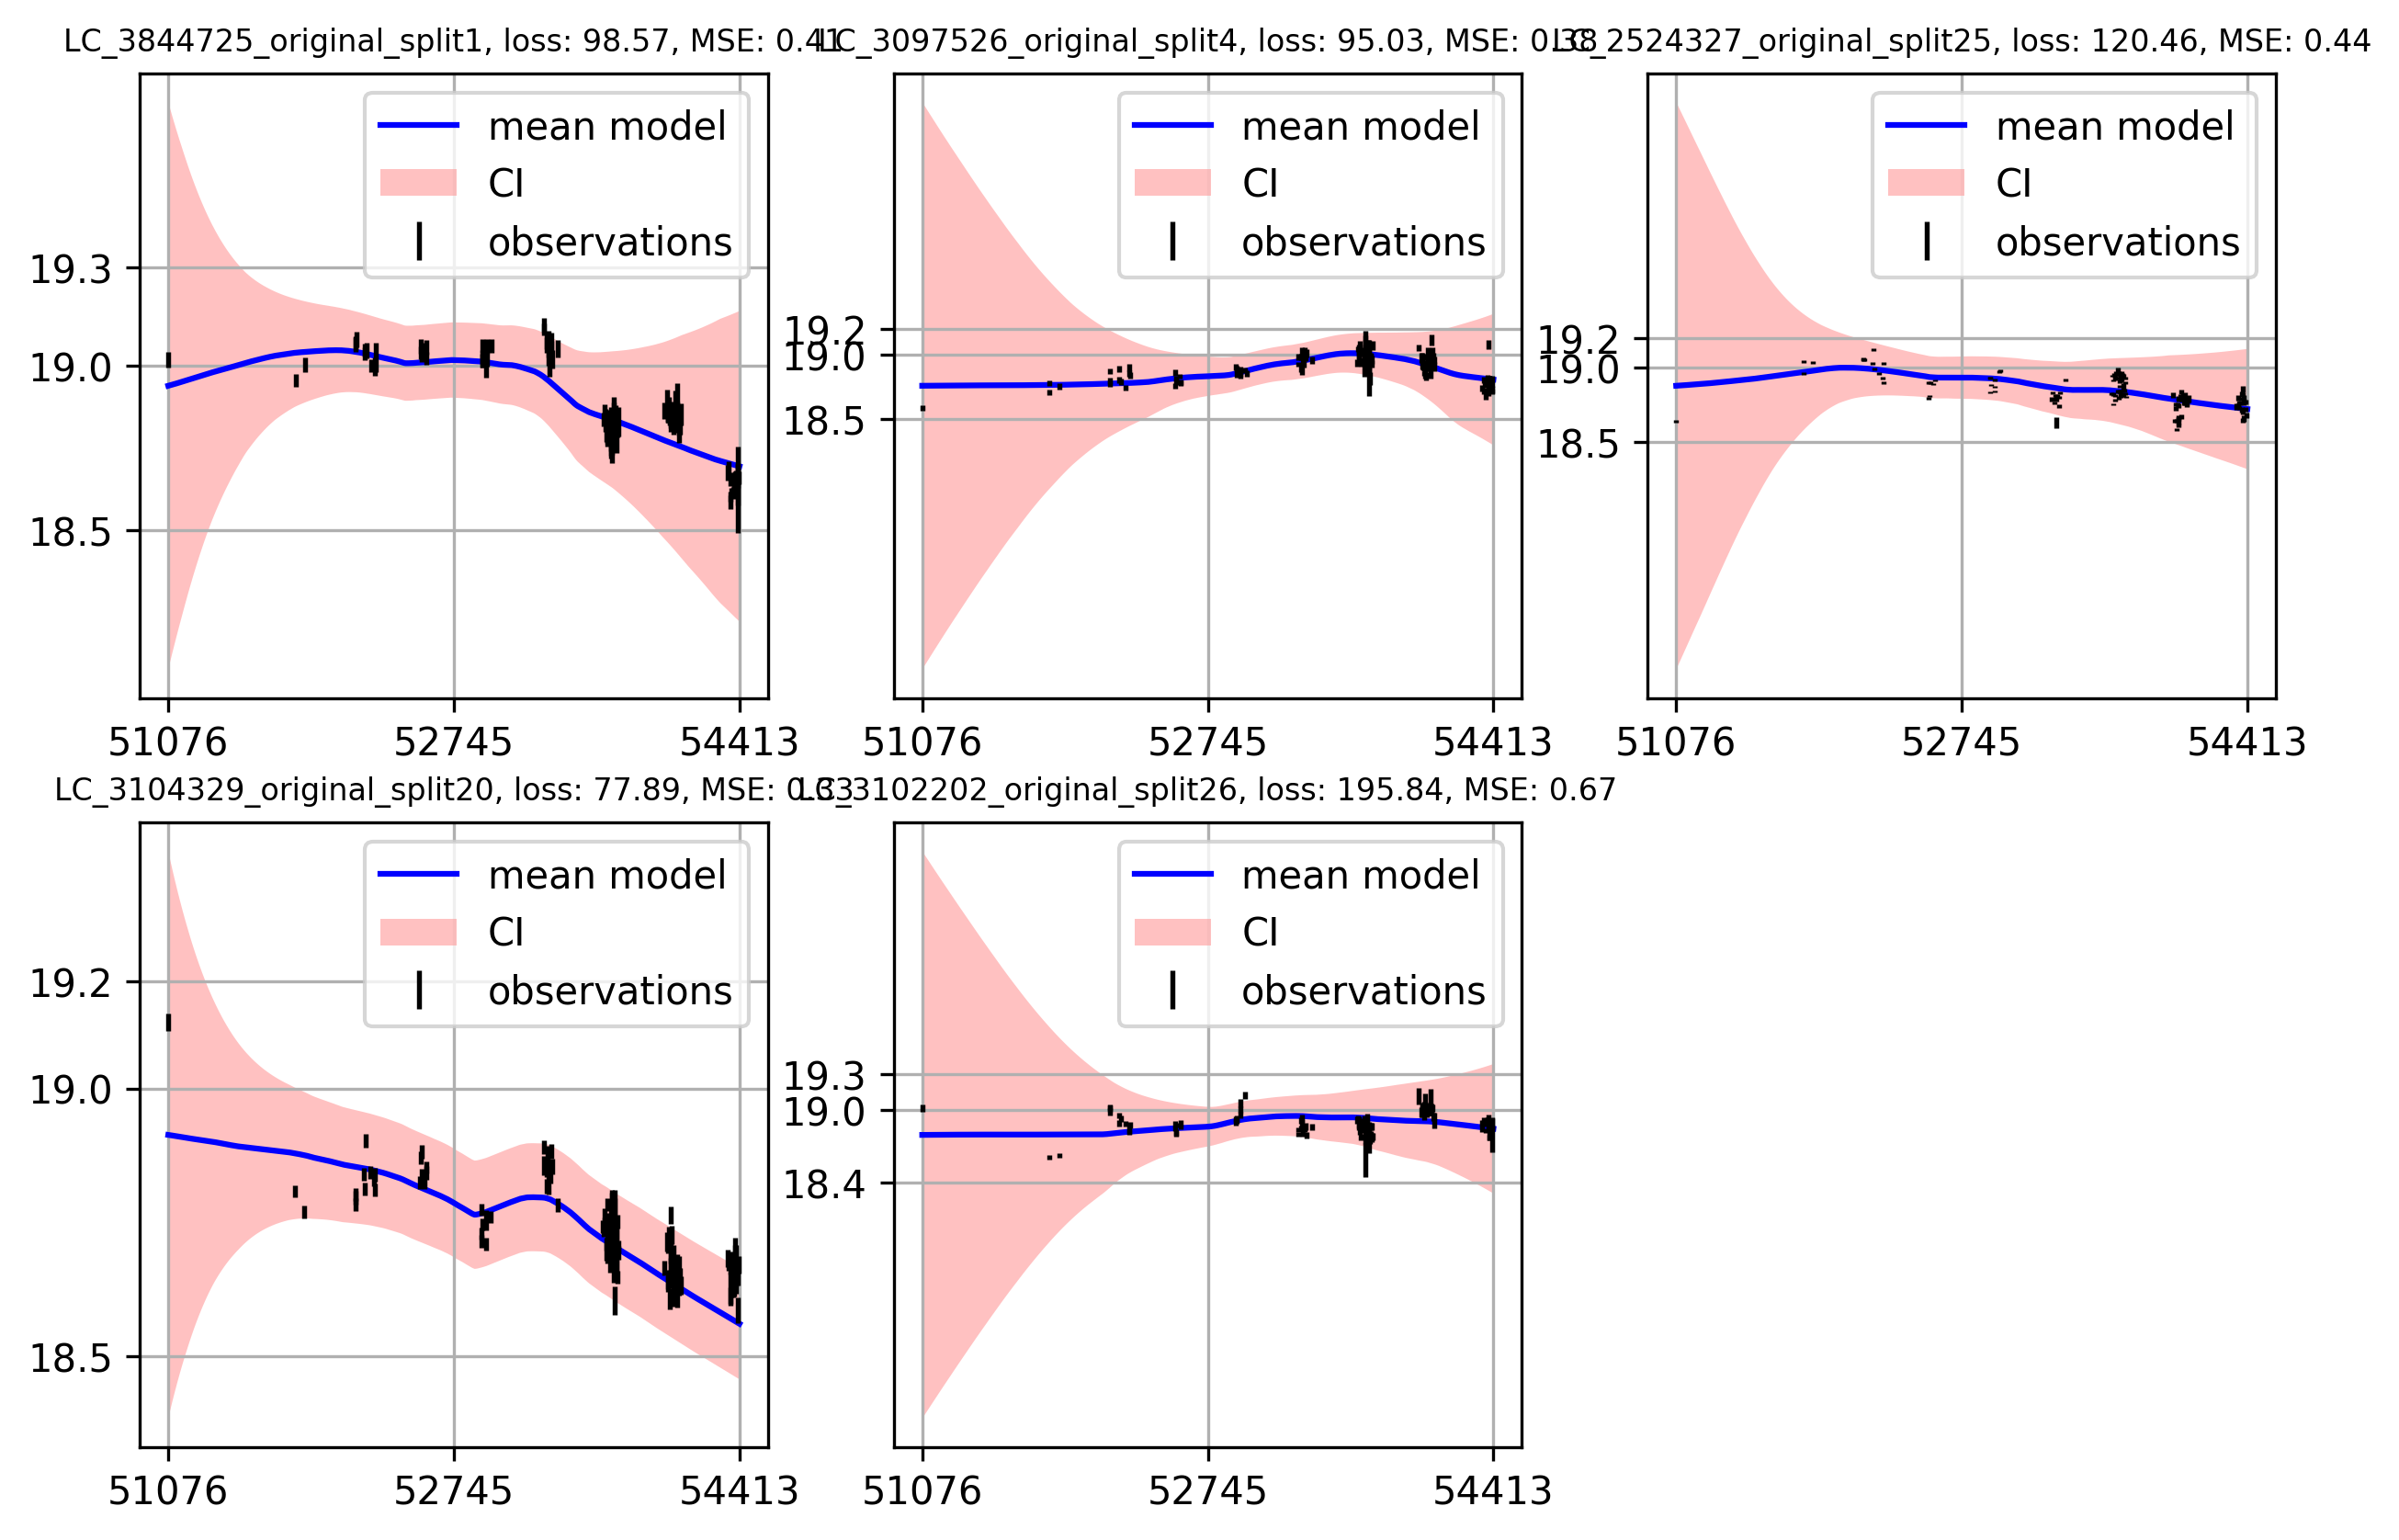

In [105]:
#prediction and plotting train data
trainMetrics=pop.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function2, device,tr)

  0%|                                                     | 0/2 [00:00<?, ?it/s]/home/meghana/.local/lib/python3.10/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:643: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 17.15it/s]


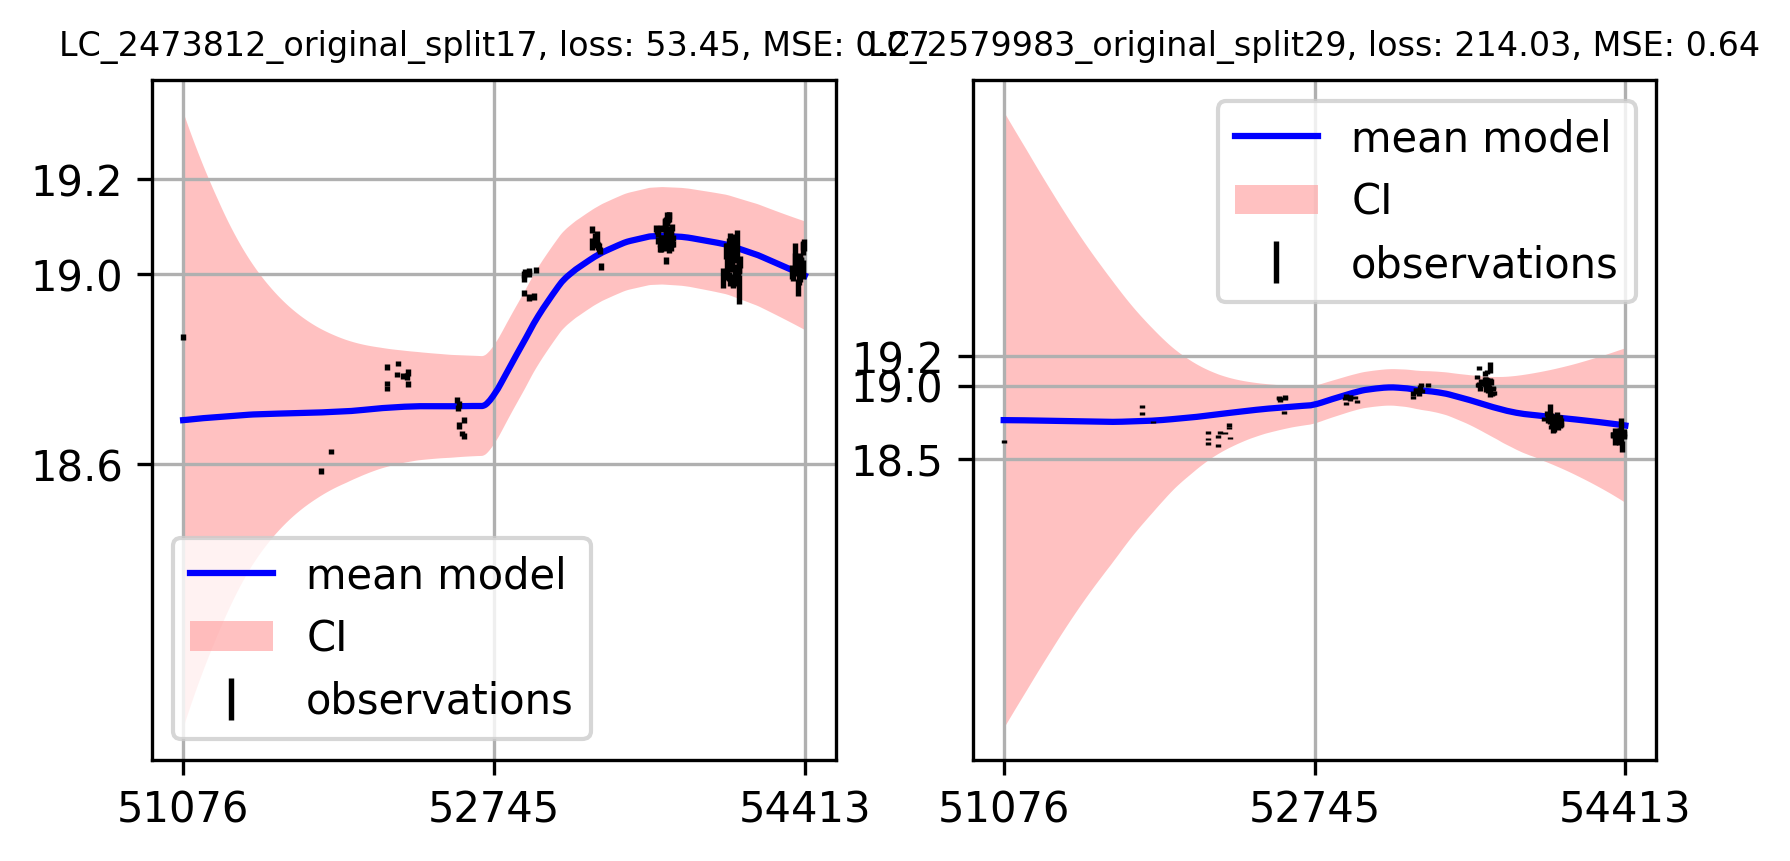

In [106]:
#prediction and plotting val data
valMetrics=pop.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

In [107]:
savetest=pop.save_test_metrics(OUTPUT_PATH, testMetrics)#saving the test metrics
savetrain=pop.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics
saveval=pop.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics

In [136]:
def analyze_light_curve(lc):
    times = lc['mjd'].values
    mags = lc['mag'].values
    
    num_points = len(times)
    if num_points < 2:
        num_gaps = 0
        mean_sampling = np.nan
        median_sampling = np.nan
    else:
        gaps = np.diff(times)
        median_gap = np.median(gaps)
        num_gaps = len(gaps[gaps > 2 * median_gap])
        mean_sampling = np.mean(gaps)
        median_sampling = median_gap

    max_mag = np.max(mags)
    min_mag = np.min(mags)
    mean_mag = np.mean(mags)
    median_mag = np.median(mags)
    
    var_amp = max_mag - min_mag
    
    return {
        'num_points': num_points,
        'num_gaps': num_gaps,
        'mean_sampling': mean_sampling,
        'median_sampling': median_sampling,
        'max_magnitude': max_mag,
        'min_magnitude': min_mag,
        'mean_magnitude': mean_mag,
        'median_magnitude': median_mag,
        'variability_amplitude': var_amp
    }

In [145]:
# Info sheet for light curves in test data
info_sheet = []

test_pred_path = './output/predictions/test/data'
test_pred_names = os.listdir(test_pred_path)
test_pred_path = ['./output/predictions/test/data/'+test_pred_names[i] for i in range(len(test_pred_names))]

for file in test_pred_path:
    lc = pd.read_csv(file)
    info = analyze_light_curve(lc)
    info['lc_id'] = os.path.basename(file)[:9]
    info_sheet.append(info)
    
info_sheet = pd.DataFrame(info_sheet).set_index('lc_id')
info_sheet.style.set_caption('Info-sheet')

In [146]:
# Info sheet for light curves in validation data
info_sheet = []

test_pred_path = './output/predictions/val/data'
test_pred_names = os.listdir(test_pred_path)
test_pred_path = ['./output/predictions/val/data/'+test_pred_names[i] for i in range(len(test_pred_names))]

for file in test_pred_path:
    lc = pd.read_csv(file)
    info = analyze_light_curve(lc)
    info['lc_id'] = os.path.basename(file)[:9]
    info_sheet.append(info)
    
info_sheet = pd.DataFrame(info_sheet).set_index('lc_id')
info_sheet.style.set_caption('Info-sheet')

In [147]:
# Info sheet for light curves in train data
info_sheet = []

test_pred_path = './output/predictions/train/data'
test_pred_names = os.listdir(test_pred_path)
test_pred_path = ['./output/predictions/train/data/'+test_pred_names[i] for i in range(len(test_pred_names))]

for file in test_pred_path:
    lc = pd.read_csv(file)
    info = analyze_light_curve(lc)
    info['lc_id'] = os.path.basename(file)[:9]
    info_sheet.append(info)
    
info_sheet = pd.DataFrame(info_sheet).set_index('lc_id')
info_sheet.style.set_caption('Info-sheet')

**Comments on QNPy modelling based on the above light curve parameters:**

- There are a high number of points and no gaps in any of the predicted light curves. 
- Regular sampling intervals has contributed to more consistent and reliable predictions.
- All light curves show low variability amplitude. So the sample likely did not contain highly variable sources.
- In conclusion, QNPy has performed well in modelling a sample of the quasar light curves from the DSS Stripe82 catalogue.

____

### References:

- Baldwin, J. A., Phillips, M. M., & Terlevich, R. 1981, PASP, 93, 5 (BPT 1981)
- Kewley et al. (2001), ApJ 556, 121
- Kewley et al. (2013), ApJ 774, 100
- Kauffman et al. (2003), MNRAS 346, 1055
- Kovacevic, A. et al. (2022), Universe, 9, 287
- Mateos, S. et al. (2012), MNRAS, 426, 3271
- Mateos, S. et al. (2013), MNRAS, 434, 941
- Trouille, L., Barger, A.J., & Tremonti, C. (2011), ApJ, 742, 46 (TBT 2011)
- Veilleux. S. & Osterbrock, D. E. (1987), ApJS, 63, 295
- Wright et al. (2010), ApJ, 140, 1868

- seaborn: statistical data visualization https://seaborn.pydata.org/
- k-correction: http://kcor.sai.msu.ru/ , http://kcorrect.org/
- QNPy: https://pypi.org/project/QNPy/
- QNPy tutorials: https://github.com/LSST-SER-SAG-S1/QNPy
- LSST SER-SAG-S1 demo session recordings: http://ser-sag.pmf.kg.ac.rs:8080/share.cgi?ssid=4fe292f9194142e39f2ec78f68ddd8ca
- QSO Light Curves: http://faculty.washington.edu/ivezic/macleod/qso_dr7/ 
- SDSS Stripe82 Catalog: http://faculty.washington.edu/ivezic/sdss/catalogs/S82variables.html
- AGN diagnostics: https://sites.google.com/site/agndiagnostics/agn-optical-line-diagnostics?authuser=0